# Section 0: Installing and importing necessary Libraries.

In [2]:
import torch
import os
import numpy as np

os.environ['TORCH'] = torch.__version__
print(torch.__version__)

2.0.0+cu117


In [3]:
# installing the necessary libraries to build the GCN
# please ensure that you have CUDA installed - it allows you to do all your processing on the GPU which is so much faster.
# also, the versions below won't install correctly unless you have torch-2.0.0+cu117 (as printed above)
!pip install torch_geometric
!pip install torch_scatter -f https://data.pyg.org/whl/torch-2.0.0+cu117.html
!pip install torch_sparse -f https://data.pyg.org/whl/torch-2.0.0+cu117.html
    
# install captum for feature importance 
!pip install captum
    

# might have to upgrade shapely:
!pip install --upgrade shapely

# other libraries that may need to be installed:
!pip install pysal

!pip install numpy
#!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu117.html



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu117.html



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# now we can import the necessary packages:

# data handling:
import geopandas as gpd
import pandas as pd
import seaborn as sns


# deep learning libraries:
from torch.nn import Linear
import torch.nn.functional as F

from torch_geometric.nn import GCNConv # Graph Convolution Network.

# Section 1: Importing dataset and data preprocessing.

In [4]:
# Lets open the dataset:

current_dir = os.path.dirname(os.path.dirname(os.getcwd()))

present_cci_sdf_path = current_dir + "\\Data\\Final\\ML_input\\present_cci_lc.shp"

present_cci_sdf = gpd.read_file(present_cci_sdf_path)


In [5]:
# Looking at how much data is available to us.
print(present_cci_sdf.shape) # 88761 rows and 25 columns - its what we expect.

(88760, 22)


In [6]:
present_cci_sdf.head()

,layer,hurs,pr,tas,tasmax,tasmin,wind,aspect,DEM,slope,...,BUILT_v,GRASS-M,GRASS-N,SHRUBS-B,SHRUBS-N,TREES-B,TREES-ND,TREES-NE,mods_wf,geometry
0,1.0,73.560760,2.169590,18.130964,23.410049,13.025126,1.904126,155.692688,82.986618,14.933476,...,0.0,10.398765,30.303236,0.0,0.0,57.338844,0.0,0.0,0.0,"POLYGON ((194175.268 576088.229, 195175.268 57..."
1,1.0,73.502945,2.185008,18.126665,23.402647,13.014404,1.894524,131.999008,204.336868,16.949665,...,0.0,13.630120,34.762264,0.0,0.0,51.607616,0.0,0.0,0.0,"POLYGON ((194175.268 575088.229, 195175.268 57..."
2,1.0,74.069092,2.334696,18.180401,23.349270,13.158223,1.938224,127.233261,159.530380,12.910676,...,0.0,14.685801,29.378992,0.0,0.0,55.888813,0.0,0.0,0.0,"POLYGON ((190175.268 574088.229, 191175.268 57..."
3,1.0,73.925247,2.307390,18.158123,23.350735,13.114095,1.925053,106.066582,145.060379,17.142456,...,0.0,16.363335,24.060419,0.0,0.0,59.576244,0.0,0.0,0.0,"POLYGON ((191175.268 574088.229, 192175.268 57..."
4,1.0,73.770706,2.274770,18.140078,23.358360,13.072411,1.911581,143.773727,123.798340,16.550346,...,0.0,5.651590,28.318676,0.0,0.0,66.023468,0.0,0.0,0.0,"POLYGON ((192175.268 574088.229, 193175.268 57..."


In [7]:
print(present_cci_sdf.dtypes)

layer        float64
hurs         float64
pr           float64
tas          float64
tasmax       float64
tasmin       float64
wind         float64
aspect       float64
DEM          float64
slope        float64
rvr_pr_      float64
BARE_vg      float64
BUILT_v      float64
GRASS-M      float64
GRASS-N      float64
SHRUBS-B     float64
SHRUBS-N     float64
TREES-B      float64
TREES-ND     float64
TREES-NE     float64
mods_wf      float64
geometry    geometry
dtype: object


In [8]:
print(present_cci_sdf.isna().any().any())

False


In [9]:
# generate unique IDs for each pixel
id_unique = range(len(present_cci_sdf))

# Insert the 'id' field at a specific position (e.g., index 0)
present_cci_sdf.insert(loc=0, column='id', value=id_unique)

# drop the 'layer' field because that's not required
present_cci_sdf = present_cci_sdf.drop(columns=['layer'])

In [10]:
# we will engineer the aspect feature.
# this is because it is represented by a 360 degree azimuth angle when we computed the aspect
# which our deep learning model cannot understand.
# therefore, we will convert this to trignometric angles:

# sine = east-west direction
# cosine = north-south direction

present_cci_sdf['aspect_sin'] = np.sin(np.radians(present_cci_sdf['aspect']))
present_cci_sdf['aspect_cos'] = np.cos(np.radians(present_cci_sdf['aspect']))

# drop the 'aspect' field because that's not required
present_cci_sdf = present_cci_sdf.drop(columns=['aspect'])

# copy it for later use
present_cci_sdf_dup = present_cci_sdf.copy()

In [11]:
present_cci_sdf.tail()

,id,hurs,pr,tas,tasmax,tasmin,wind,DEM,slope,rvr_pr_,...,GRASS-N,SHRUBS-B,SHRUBS-N,TREES-B,TREES-ND,TREES-NE,mods_wf,geometry,aspect_sin,aspect_cos
88755,88755,67.043205,0.414750,22.564177,25.114225,19.681204,4.434548,2.545327,1.853419,696.071777,...,0.223603,0.000000,0.0,0.000000,0.0,0.0,0.0,"POLYGON ((224175.268 2088.229, 225175.268 2088...",0.911699,-0.410859
88756,88756,67.515709,0.408719,22.453941,25.018141,19.542782,4.487360,1.099293,1.207141,215.039566,...,36.041607,6.562372,0.0,0.000000,0.0,0.0,0.0,"POLYGON ((218175.268 1088.229, 219175.268 1088...",0.986568,-0.163352
88757,88757,67.424324,0.409046,22.474804,25.035170,19.570976,4.476474,1.197518,1.603551,231.404037,...,32.541813,5.109278,0.0,0.077757,0.0,0.0,0.0,"POLYGON ((219175.268 1088.229, 220175.268 1088...",0.512003,-0.858984
88758,88758,67.341003,0.409806,22.494078,25.051552,19.595900,4.466919,1.623115,1.331315,227.402740,...,53.905895,10.906585,0.0,1.334214,0.0,0.0,0.0,"POLYGON ((220175.268 1088.229, 221175.268 1088...",0.301694,-0.953405
88759,88759,67.266235,0.411026,22.511665,25.067247,19.617353,4.458775,1.982349,1.290080,215.649963,...,46.577129,10.072224,0.0,0.769394,0.0,0.0,0.0,"POLYGON ((221175.268 1088.229, 222175.268 1088...",0.612106,-0.790775


In [12]:
present_cci_sdf.shape

(88760, 23)

0.0    69790
1.0    18970
Name: mods_wf, dtype: int64


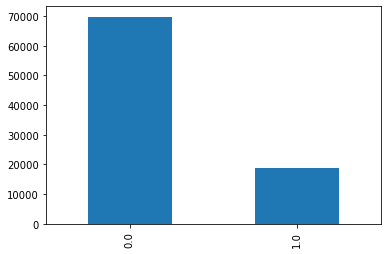

In [13]:
# histogram of frequency
import matplotlib.pyplot as plt
freq = present_cci_sdf['mods_wf'].value_counts().sort_index()

print(freq)

fig, ax = plt.subplots()
ax = freq.plot(kind='bar')


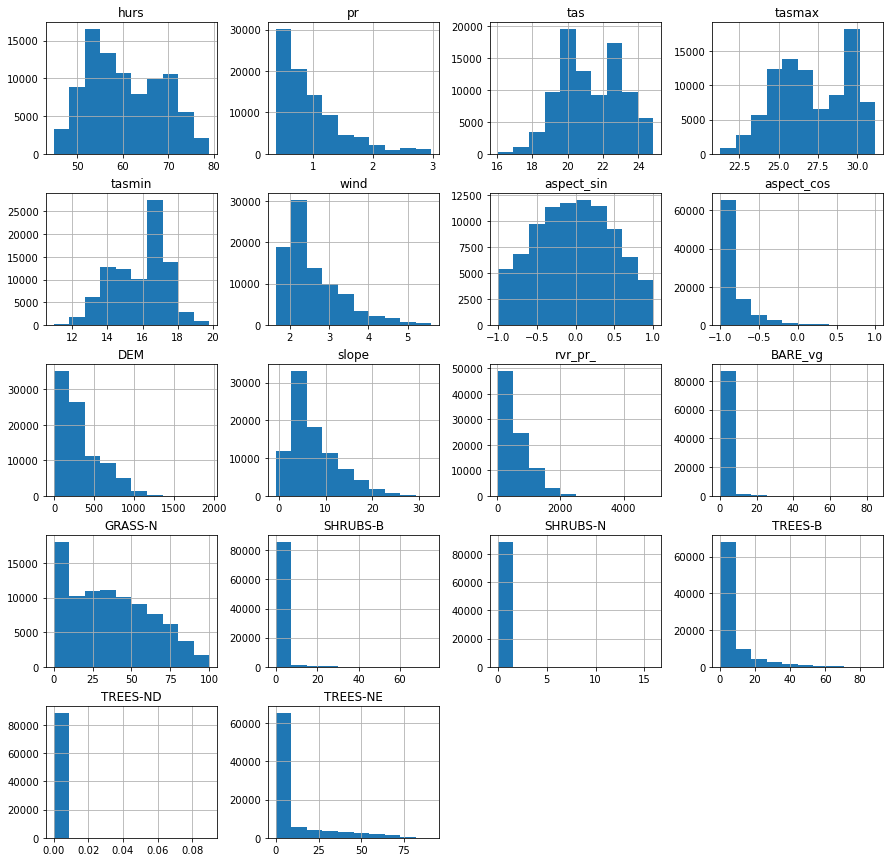

In [14]:
# Univariate analysis
pd.DataFrame.hist(present_cci_sdf[['hurs', 'pr', 'tas', 'tasmax', 'tasmin', 'wind', 'aspect_sin',
                                      'aspect_cos','DEM', 'slope', 'rvr_pr_', 'BARE_vg','GRASS-N',
                                      'SHRUBS-B', 'SHRUBS-N', 'TREES-B', 'TREES-ND', 'TREES-NE']], figsize = [15,15]);

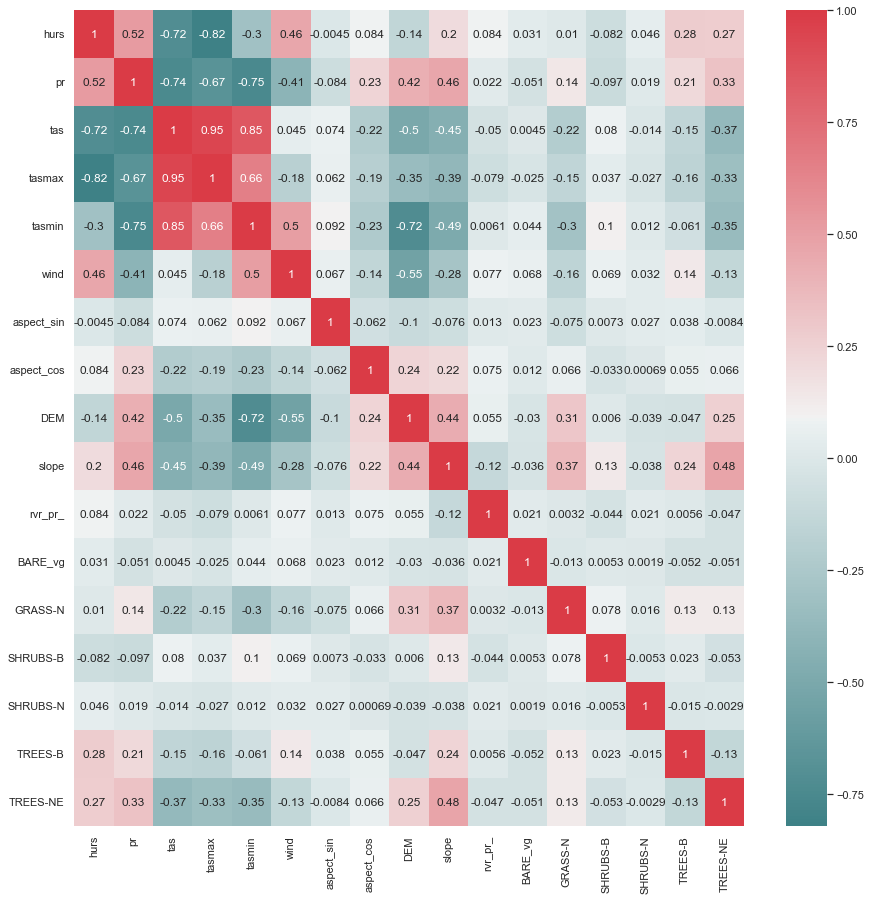

In [112]:
correlation_matrix = present_cci_sdf[['hurs', 'pr', 'tas', 'tasmax', 'tasmin', 'wind', 'aspect_sin',
                                  'aspect_cos','DEM', 'slope', 'rvr_pr_', 'BARE_vg',
                                  'GRASS-N','SHRUBS-B', 'SHRUBS-N', 'TREES-B', 'TREES-NE']].corr()

sns.set(font_scale = 1)
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

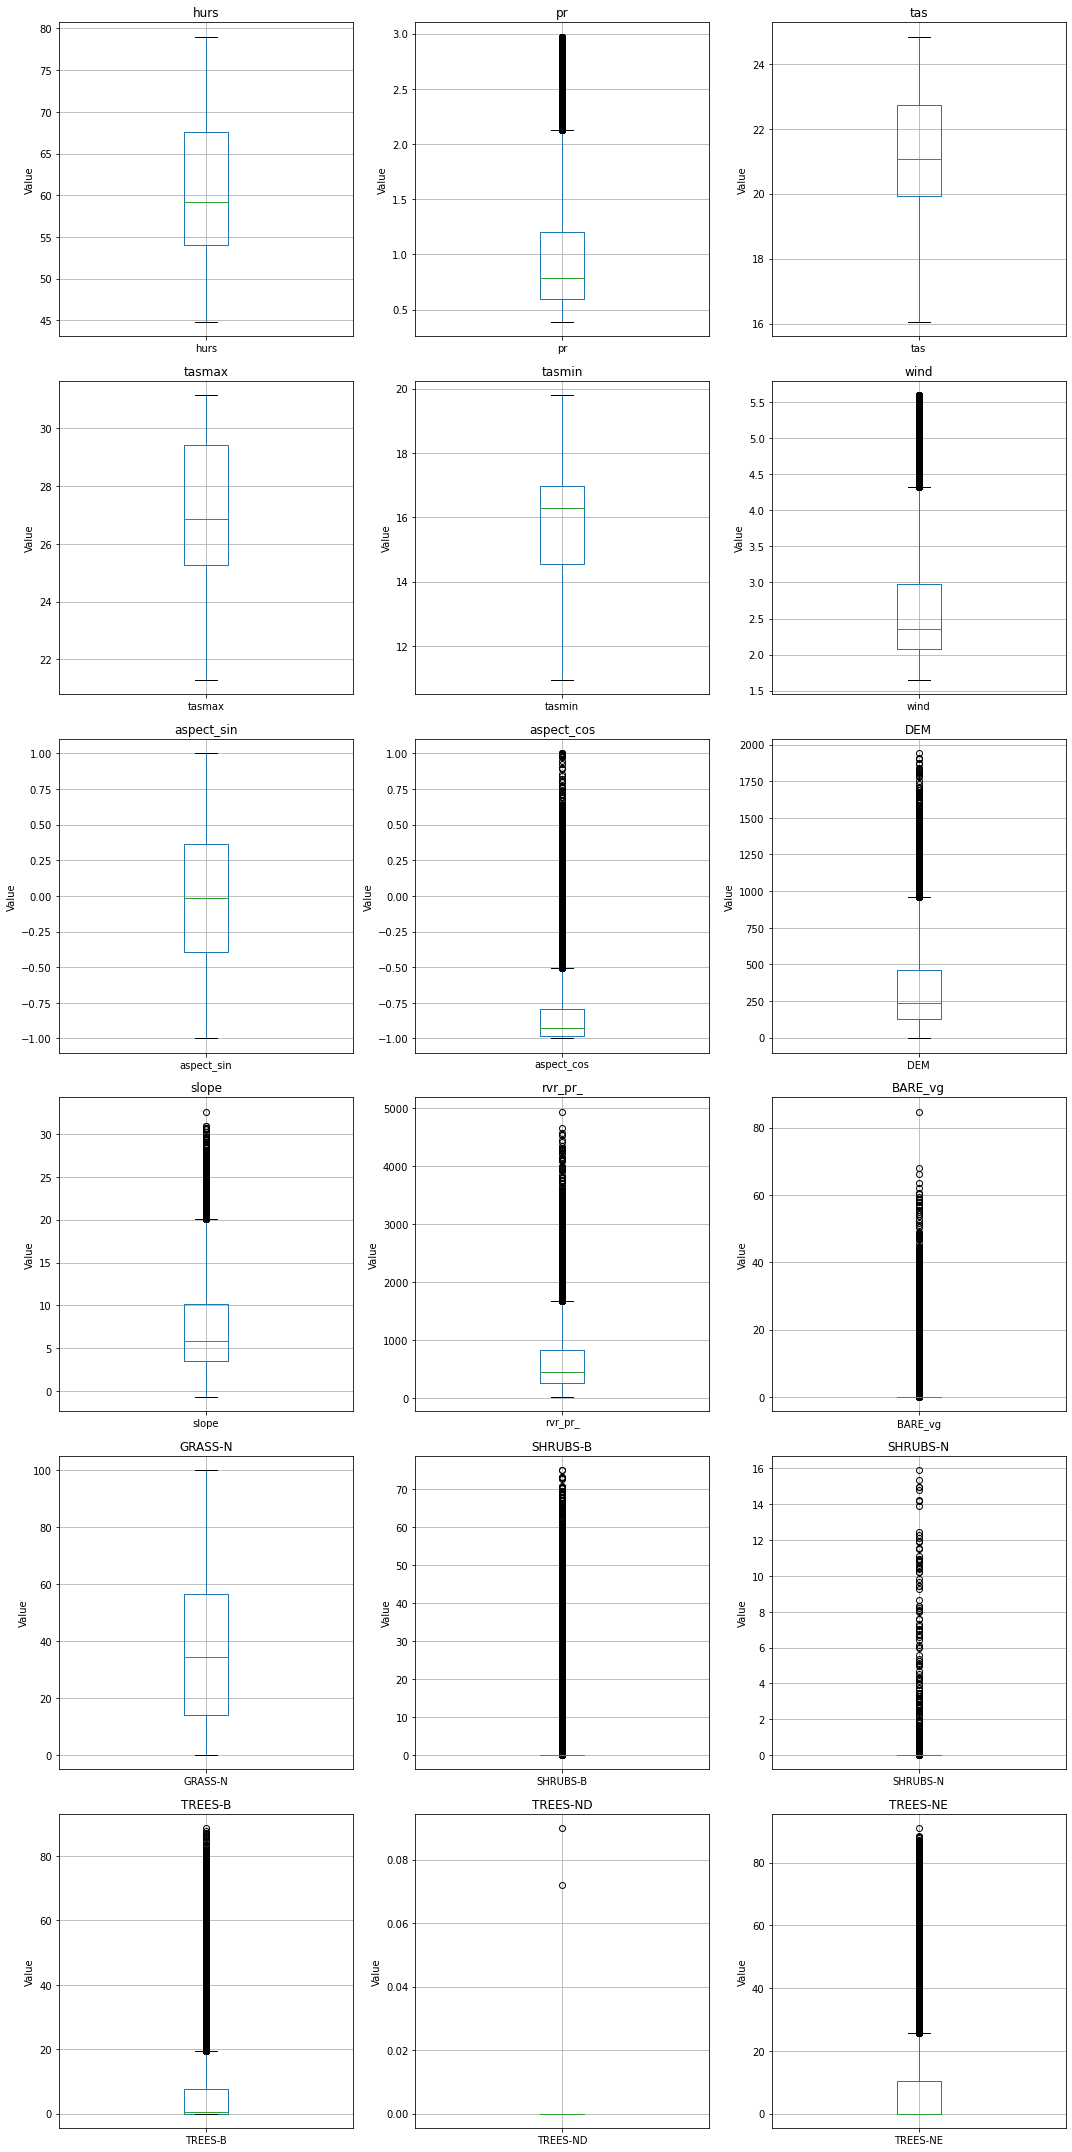

In [15]:
# Univariate analysis
columns_to_plot = ['hurs', 'pr', 'tas', 'tasmax', 'tasmin', 'wind', 'aspect_sin',
                   'aspect_cos','DEM', 'slope', 'rvr_pr_', 'BARE_vg','GRASS-N',
                   'SHRUBS-B', 'SHRUBS-N', 'TREES-B', 'TREES-ND', 'TREES-NE']

# Calculate the number of rows and columns for the grid of plots
n_cols = 3  # you can adjust this depending on how many plots you want per row
n_rows = -(-len(columns_to_plot) // n_cols)  # this is a ceiling division trick

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=[15, 5 * n_rows])

for i, col in enumerate(columns_to_plot):
    r, c = divmod(i, n_cols)
    present_cci_sdf[[col]].boxplot(ax=axes[r, c])
    axes[r, c].set_title(col)
    axes[r, c].set_ylabel("Value")

# Turn off any remaining empty subplots
for j in range(i+1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    axes[r, c].axis('off')

plt.tight_layout()
plt.show()

# Section 2: Spatial Blocking for train-test-validation splitting.

The nature of the problem we are trying to solve is a spatial one. This means that the distribution of wildfires in Portugal from 2001 - 2021 displays spatial dependence (or autocorrelation). Essentially, nearby areas are more similar to areas that are further away, as per Tobler's First Law of Geography. 

This property of spatial data has heavy implications on how we should model spatial patterns in wildfires and can typically be achieved with Machine Learning algorithms that explicitly take into account spatial dependence. In addition, the way the data is fed into the algorithms can also impact the analysis further down the line. For example, conventional ML tasks involve shuffling the instances before splitting them into their train-test-validation sets. This is to reduce the variability and potentially ordering bias resulting from the sampling procedure. Indeed, this is necessary to improve overall generalization of the model, as well as to reduce overfitting. 

It should be noted that such data are typically unstructured - that is - there are no dependencies between instances within dataset. However, as we have already discussed, spatial data is highly structured and (more often than not) tend to exhib high levels of spatial dependencies between observations that are spatially proximous. Therefore, a random shuffle of the dataset when determining train-test-validation sets is detrimental for spatial analysis and modelling as this structure is destroyed. This can lead to over-fitting and very optimistic results. 

To prevent this, we will adopt a method referred to as 'spatial blocking' which preserves some degree of spatial structure in the data. Essentially, we define non-overlapping 'blocks' of size *n* * *n* over our study region and group our regular grid of polygons for the analysis based on whether they fall into these blocks. The blocks will then be shuffled after which a train-test-validation split of 70-15-15 will be determined.

Note that the graph has already been generated. This means that the spatial structure of the dataset is ALREADY preserved. The ML model will be trained on that graph. However, during the training process, the test and validation set will be 'hidden' from the model, allowing it to learn weights and perform back-propagation only on the training set. 

In [16]:
# spatial blocking

from shapely.geometry import Polygon

# generation of polygon blocks. Code by Mativane (2019).
# found at: https://gis.stackexchange.com/questions/269243/creating-polygon-grid-using-geopandas

# define block size

# raster is about 1km by 1km 

res_x, res_y = 10000, 10000

# this will create a block of size 40 km * 40 km

# get the bounds of the entire portugal cell dataset

xmin,ymin,xmax,ymax = present_cci_sdf.total_bounds


# generate the blocks using numpy

# first you build up the columns and rows:
# generate an array of x/y grid size from the minimum of x/y to the maximum

cols = list(np.arange(xmin, 
                      xmax + res_x, 
                      res_x))

rows = list(np.arange(ymin, 
                      ymax + res_y, 
                      res_y))

print('Number of rows:', len(rows))
print('\nNumber of columns:', len(cols))


block_poly = []

for x in cols[:-1]:
    
    for y in rows[:-1]:
        
        block_poly.append(Polygon([(x,y), 
                                   (x + res_x, y), 
                                   (x + res_x, y + res_y), 
                                   (x, y + res_y)]))


        

Number of rows: 59

Number of columns: 30


In [17]:
# create a new GeoDataFrame with the blocks

block_dataframe = gpd.GeoDataFrame({'geometry':block_poly}, 
                                   crs=present_cci_sdf.crs)

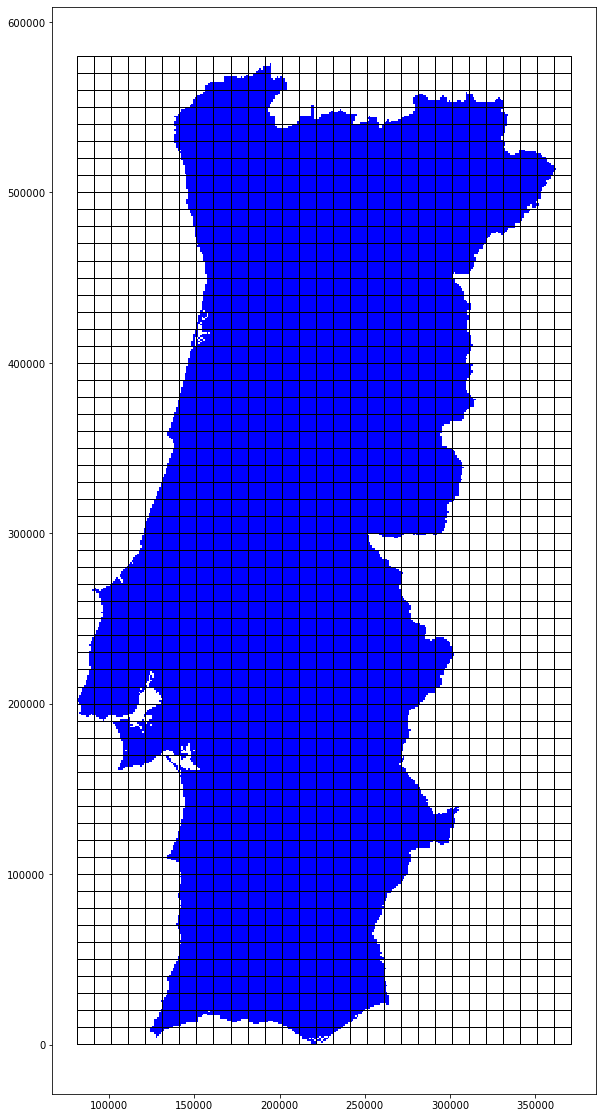

In [18]:
# lets visualise the blocks with the actual cells of our AOI:

fig, ax = plt.subplots(figsize=(20, 20))

present_cci_sdf.plot(ax=ax, color="blue")


block_dataframe.plot(ax=ax, 
                     edgecolor="k",
                     facecolor="none")
plt.show()


In [19]:
# assign each observation to a block

#  calculate the centroids of wildfires because for within the geometry has to be COMPLETELY WITHIN.
# i.e. if you use the raw polygons, there may be a slight difference which may not result in the desired outcome
# converting it into centroids will ensure that that will work as we intend! 
present_cci_sdf['centroid'] = present_cci_sdf.geometry.centroid

# Then, create a new GeoDataFrame with the same data but set the geometry to the centroids
wild_fires_centroids = gpd.GeoDataFrame(present_cci_sdf, geometry='centroid')

# Now, perform the spatial join using the 'within' operation
present_cci_sdf = gpd.sjoin(wild_fires_centroids, 
                           block_dataframe, 
                           how="inner", 
                           predicate='within')

# After the join, you can set the geometry back to the original polygons if needed
present_cci_sdf.set_geometry('geometry', inplace=True)

In [20]:
present_cci_sdf.shape

(88760, 25)

In [21]:
# rename the 'index right' column to something more sensible.

present_cci_sdf= present_cci_sdf.rename(columns = {'index_right': 'block_id'})
# drop the 'layer' field because that's not required
present_cci_sdf = present_cci_sdf.drop(columns=['centroid'])

In [22]:
present_cci_sdf.sort_index(inplace=True)

In [23]:
present_cci_sdf.loc[70000:70010]

,id,hurs,pr,tas,tasmax,tasmin,wind,DEM,slope,rvr_pr_,...,SHRUBS-B,SHRUBS-N,TREES-B,TREES-ND,TREES-NE,mods_wf,geometry,aspect_sin,aspect_cos,block_id
70000,70000,49.038349,0.588956,24.028526,30.643320,17.801004,2.127034,199.092178,7.942091,430.662628,...,0.249125,0.0,5.530063,0.0,0.000000,0.0,"POLYGON ((246175.268 154088.229, 247175.268 15...",0.468245,-0.883599,943
70001,70001,48.896885,0.583860,24.102165,30.707478,17.867037,2.113339,185.711609,7.734334,455.932343,...,8.710885,0.0,5.561726,0.0,0.000000,0.0,"POLYGON ((247175.268 154088.229, 248175.268 15...",0.305631,-0.952150,943
70002,70002,48.764481,0.579034,24.171597,30.768059,17.928968,2.100578,159.864334,9.745607,130.545303,...,19.974747,0.0,5.506104,0.0,0.000000,0.0,"POLYGON ((248175.268 154088.229, 249175.268 15...",-0.326831,-0.945083,943
70003,70003,48.643883,0.574675,24.234447,30.823154,17.984346,2.089217,167.432053,7.742745,163.645325,...,29.092033,0.0,8.224436,0.0,2.797892,0.0,"POLYGON ((249175.268 154088.229, 250175.268 15...",-0.051580,-0.998669,943
70004,70004,48.537827,0.570981,24.288340,30.870850,18.030710,2.079724,162.584122,5.730092,215.119507,...,21.195929,0.0,0.591574,0.0,1.086347,0.0,"POLYGON ((250175.268 154088.229, 251175.268 15...",-0.445640,-0.895212,943
70005,70005,48.447025,0.567900,24.333826,30.911898,18.068670,2.072163,182.630600,5.468083,296.162720,...,0.718955,0.0,1.123022,0.0,0.000000,0.0,"POLYGON ((251175.268 154088.229, 252175.268 15...",0.325575,-0.945516,1001
70006,70006,48.368336,0.565082,24.375015,30.949968,18.102520,2.065932,182.418762,4.154648,116.029549,...,0.000000,0.0,0.383511,0.0,0.000000,0.0,"POLYGON ((252175.268 154088.229, 253175.268 15...",0.161134,-0.986932,1001
70007,70007,48.300289,0.562511,24.412180,30.985018,18.132509,2.060828,205.715515,2.903687,594.220764,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,"POLYGON ((253175.268 154088.229, 254175.268 15...",-0.106544,-0.994308,1001
70008,70008,48.241459,0.560176,24.445513,31.016926,18.158804,2.056659,209.400848,2.026641,1172.305664,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,"POLYGON ((254175.268 154088.229, 255175.268 15...",0.177292,-0.984158,1001
70009,70009,48.190422,0.558067,24.475210,31.045578,18.181570,2.053232,204.777832,1.897149,1053.374268,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,"POLYGON ((255175.268 154088.229, 256175.268 15...",-0.435238,-0.900315,1001


In [24]:
# now what we want to do is to split the block ids into the train-test-validation set.
# after that, the nodes that correspond to these block ids will be masked during training.
# i.e. the algorithm will train weights only on the training set.

# first get the unique id 
unique_blocks = present_cci_sdf['block_id'].unique()
unique_blocks

array([ 695,  637,  636,  694,  578,  520,  752,  462,  461,  519,  577,
        635,  693, 1331, 1215, 1389, 1157, 1273,  403, 1447,  809,  402,
        460,  518,  576,  634,  692,  808, 1156, 1214, 1272, 1330, 1388,
       1446,  924,  866, 1504,  344,  982, 1040, 1098,  750,  343,  401,
        459,  517,  575,  633,  691,  749,  807,  865,  923,  981, 1039,
       1097, 1155, 1213, 1271, 1329, 1387, 1445, 1503,  342,  400,  458,
        516,  574,  632,  690,  748,  806,  864,  922,  980, 1038, 1096,
       1154, 1212, 1270, 1328, 1386, 1444, 1502, 1560, 1618,  399,  457,
        515,  573,  631,  689,  747,  805,  863,  921,  979, 1037, 1095,
       1153, 1211, 1269, 1327, 1385, 1443, 1501, 1559, 1617, 1675,  398,
        456,  514,  572,  630,  688,  746,  804,  862,  920,  978, 1036,
       1094, 1152, 1210, 1268, 1326, 1384, 1442, 1500, 1558, 1616,  397,
        455,  513,  571,  629,  687,  745,  803,  861,  919,  977, 1035,
       1093, 1151, 1209, 1267, 1325, 1383, 1441, 14

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


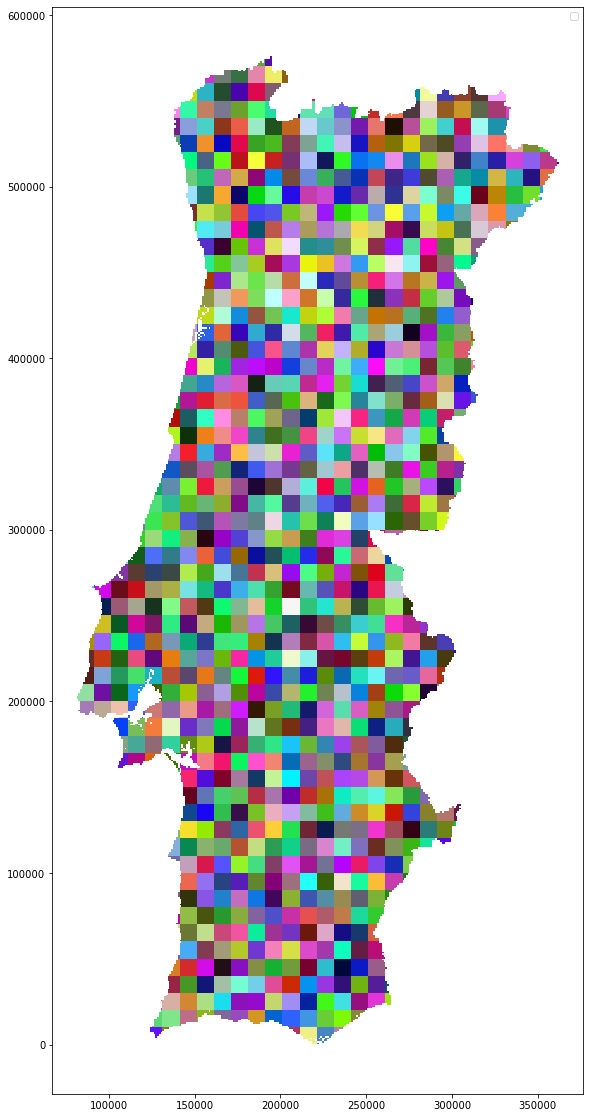

In [25]:
import random

# Assign a random color to each unique value (RGB values)

colours = np.random.rand(len(unique_blocks), 3)

colourmap = {}

for a, b in zip(unique_blocks, colours):
    colourmap[a] = b

# Plot

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

for value, colour in colourmap.items():
    mask = present_cci_sdf['block_id'] == value
    present_cci_sdf[mask].plot(ax=ax, color=colour, label=value)

ax.legend()

plt.show()

In [26]:
from sklearn.model_selection import train_test_split

train_block, intermediate_block = train_test_split(unique_blocks, 
                                                  test_size = 0.3,
                                                  random_state = 1)

test_block, validation_block = train_test_split(intermediate_block,#
                                               test_size = 0.5,
                                               random_state = 7)


In [27]:
# lets count the number of instances in each split:

train_count = present_cci_sdf[present_cci_sdf['block_id'].isin(train_block)].shape[0]
test_count = present_cci_sdf[present_cci_sdf['block_id'].isin(test_block)].shape[0]
val_count = present_cci_sdf[present_cci_sdf['block_id'].isin(validation_block)].shape[0]

total_count =  train_count + test_count + val_count

print(f'Total: {total_count}')

print(f"Train count: {train_count}, percentage: {(train_count/total_count) * 100}") 
print(f"Test count: {test_count}, percentage: {(test_count/total_count) * 100}") 
print(f"Validation count: {val_count}, percentage: {(val_count/total_count) * 100}") 

# the split is actually not bad considering we have some edge blocks that have very low number of instances.

Total: 88760
Train count: 62060, percentage: 69.9188823794502
Test count: 13413, percentage: 15.11153672825597
Validation count: 13287, percentage: 14.969580892293827


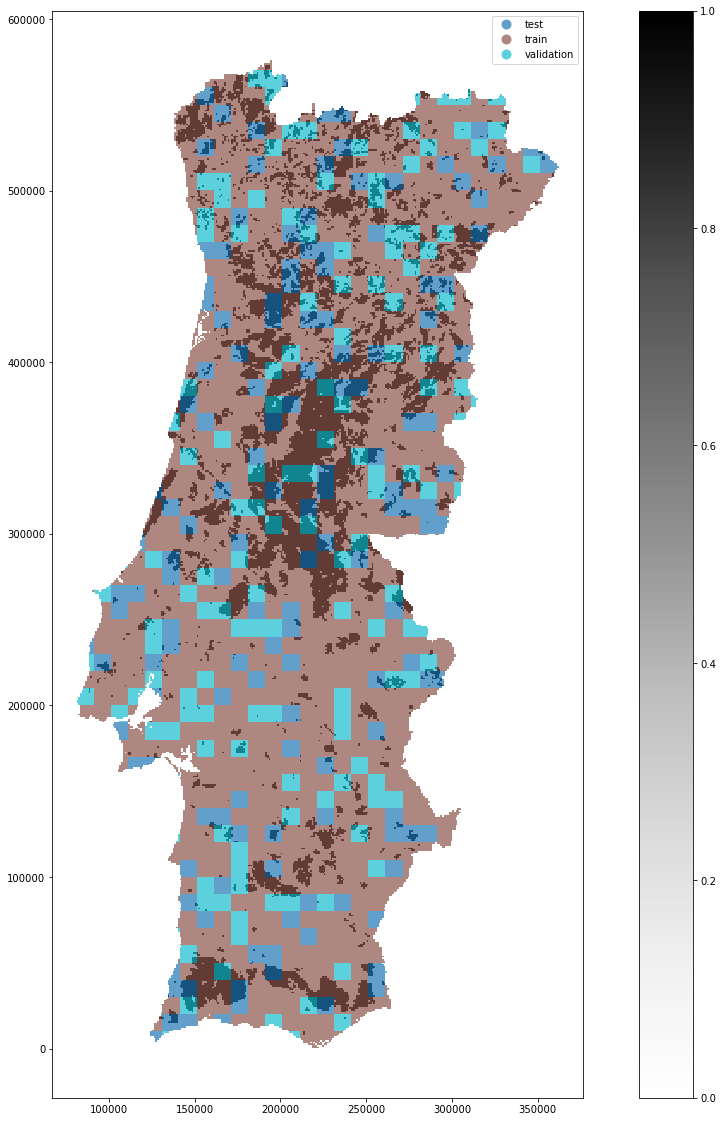

In [28]:
# i want to now visualise the study region based on the train-test-validation split.
# we want to make sure that the validation and test sets are not completely.

# label each instance based on whether they are in the train-test-validation set.


condition_train = present_cci_sdf['block_id'].isin(train_block)
condition_test = present_cci_sdf['block_id'].isin(test_block)
condition_val = present_cci_sdf['block_id'].isin(validation_block)

conditions = [condition_train, condition_test, condition_val]

labels = ['train', 'test', 'validation']

present_cci_sdf['split'] = np.select(conditions, labels)

# visualise
fig, ax = plt.subplots(figsize=(20, 20))

present_cci_sdf.plot(ax=ax, 
                    legend = True,
                    column = 'mods_wf',
                    cmap ='Greys')

present_cci_sdf.plot(ax=ax, 
                    legend = True,
                    column='split',
                    alpha=0.70
                   )

plt.show()


In [29]:
# data normalization.

def extract_x_y_i(split):
    
    # features
    xs = split[['hurs', 'pr', 'tas', 'tasmax', 'tasmin', 'wind', 'aspect_sin',
                'aspect_cos','DEM', 'slope', 'rvr_pr_', 'BARE_vg', 'BUILT_v',
                'GRASS-N','SHRUBS-B', 'SHRUBS-N', 'TREES-B', 'TREES-ND', 'TREES-NE']]
    
    # target label
    ys = split['mods_wf']
    
    # save the id as well so that we can reconstruct the dataframe with the normalised values.
    
    ids = split['id']
    
    return xs, ys, ids
    

# subset the data based on the train/test/validation labels.
train_split = present_cci_sdf[present_cci_sdf['split'] == 'train']
test_split = present_cci_sdf[present_cci_sdf['split'] == 'test']
validation_split = present_cci_sdf[present_cci_sdf['split'] == 'validation']

# now lets extract the values
xs_train, ys_train, id_train = extract_x_y_i(train_split)
xs_test, ys_test, id_test = extract_x_y_i(test_split)
xs_validation, ys_validation, id_validation = extract_x_y_i(validation_split)

id_test

81          81
115        115
116        116
151        151
152        152
         ...  
88675    88675
88676    88676
88699    88699
88700    88700
88719    88719
Name: id, Length: 13413, dtype: int64

In [30]:
xs_train.head()

,hurs,pr,tas,tasmax,tasmin,wind,aspect_sin,aspect_cos,DEM,slope,rvr_pr_,BARE_vg,BUILT_v,GRASS-N,SHRUBS-B,SHRUBS-N,TREES-B,TREES-ND,TREES-NE
0,73.560760,2.169590,18.130964,23.410049,13.025126,1.904126,0.411631,-0.911351,82.986618,14.933476,74.257401,0.0,0.0,30.303236,0.0,0.0,57.338844,0.0,0.0
1,73.502945,2.185008,18.126665,23.402647,13.014404,1.894524,0.743156,-0.669118,204.336868,16.949665,318.608276,0.0,0.0,34.762264,0.0,0.0,51.607616,0.0,0.0
2,74.069092,2.334696,18.180401,23.349270,13.158223,1.938224,0.796179,-0.605061,159.530380,12.910676,513.545715,0.0,0.0,29.378992,0.0,0.0,55.888813,0.0,0.0
3,73.925247,2.307390,18.158123,23.350735,13.114095,1.925053,0.960941,-0.276754,145.060379,17.142456,358.473694,0.0,0.0,24.060419,0.0,0.0,59.576244,0.0,0.0
4,73.770706,2.274770,18.140078,23.358360,13.072411,1.911581,0.590976,-0.806689,123.798340,16.550346,152.072922,0.0,0.0,28.318676,0.0,0.0,66.023468,0.0,0.0


In [31]:
# standard scaling:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = RobustScaler()

xs_train_scaled = scaler.fit_transform(xs_train)
xs_validation_scaled = scaler.transform(xs_validation)
xs_test_scaled = scaler.transform(xs_test)
    

# check if the normalisation worked:
np.set_printoptions(suppress=True)
print ("\n")
print(np.mean(xs_train_scaled, axis = 0))
print(np.mean(xs_validation_scaled, axis=0))
print(np.mean(xs_test_scaled, axis=0))

# satisfactory



[ 0.11498847  0.32245074  0.08404959  0.07506097 -0.18022139  0.26589181
 -0.00267026  0.43324434  0.25014198  0.22716623  0.25291509  0.46670406
  1.64756323  0.04915571  0.90760003  0.01175233  0.76638011  0.00000261
  0.91329469]
[ 0.12203263  0.30078408  0.04139723  0.04882266 -0.22254522  0.26550298
  0.01775302  0.40920156  0.30633502  0.24708583  0.2628846   0.48540414
  2.0318719   0.0378626   0.49508985  0.0007786   0.81255361  0.
  0.83963686]
[ 0.17166652  0.325768    0.06169155  0.03419024 -0.16114338  0.33337253
  0.01960335  0.45386118  0.21717398  0.28841006  0.24604521  0.36507875
  2.32998254  0.05598425  0.87339261  0.0029226   0.79841738  0.
  1.03886121]


In [32]:
# now we reconstruct the dataframe with these scaled values!

# first we need to convert the x values back into dataframes, preserving both the indices and the column names:
xs_train_2 = pd.DataFrame(xs_train_scaled, index=xs_train.index, columns=xs_train.columns)
xs_test_2 = pd.DataFrame(xs_test_scaled, index=xs_test.index, columns=xs_test.columns)
xs_validation_2 = pd.DataFrame(xs_validation_scaled, index=xs_validation.index, columns=xs_validation.columns)



scaled_train_split = pd.concat([id_train, xs_train_2, ys_train], axis=1)
scaled_test_split = pd.concat([id_test, xs_test_2, ys_test], axis=1)
scaled_validation_split = pd.concat([id_validation, xs_validation_2, ys_validation], axis=1)


In [33]:
# check intregity of the indices
# bascially, this checks to see if the index in the original dataframe is equal to the index in the train test and 
# validation splits
# if they're not you fucked up and you need to go back and check that shit

mask_train = (scaled_train_split.index == scaled_train_split['id'])
mask_test = (scaled_test_split.index == scaled_test_split['id'])
mask_val = (scaled_validation_split.index == scaled_validation_split['id'])


print(f'train set validity: {mask_train.all()}')
print(f'test set validity: {mask_test.all()}')
print(f'validation set validity: {mask_val.all()}')

train set validity: True
test set validity: True
validation set validity: True


In [34]:
scaled_validation_split.head()

,id,hurs,pr,tas,tasmax,tasmin,wind,aspect_sin,aspect_cos,DEM,...,rvr_pr_,BARE_vg,BUILT_v,GRASS-N,SHRUBS-B,SHRUBS-N,TREES-B,TREES-ND,TREES-NE,mods_wf
30,30,1.153790,2.818992,-0.877352,-0.790746,-1.129452,-0.444177,0.241427,-0.318279,-0.500727,...,-0.177087,0.0,1.09635,-0.064127,0.0,0.0,5.277750,0.0,0.000000,0.0
31,31,1.144739,2.805049,-0.898244,-0.800466,-1.160525,-0.461661,0.692760,0.329815,-0.397339,...,0.718178,0.0,0.00000,0.054859,0.0,0.0,1.866303,0.0,0.000000,0.0
32,32,1.135487,2.788666,-0.919638,-0.810559,-1.192033,-0.478483,1.195747,2.425173,-0.267846,...,0.719242,0.0,0.00000,0.246490,0.0,0.0,3.515594,0.0,0.036185,0.0
33,33,1.126028,2.768908,-0.941190,-0.820755,-1.223681,-0.494622,1.095081,1.778700,-0.241256,...,-0.399613,0.0,0.00000,0.187675,0.0,0.0,4.276999,0.0,0.010055,0.0
34,34,1.116356,2.744842,-0.962555,-0.830791,-1.255176,-0.510059,1.002000,1.324129,-0.144749,...,-0.403194,0.0,0.00000,-0.247439,0.0,0.0,1.955577,0.0,0.000000,0.0


In [35]:
# check to see for any NA values - indicates that something went wrong.
scaled_test_split.isna().any().any()


False

In [36]:
# and finally, we can attach this back to the original dataset for processing further on:

# first let's get rid of all the un-scaled features.
present_cci_sdf = present_cci_sdf[['geometry', 'block_id' ]]

# merge the scaled train test and validation sets vertically:
merged_scaled = pd.concat([scaled_train_split, scaled_test_split, scaled_validation_split])
merged_scaled.sort_index(inplace=True)

In [37]:
# checking to see if there has been a shift in any of the id values.
# we want the id values to remain constant.
mask = (merged_scaled.index == merged_scaled['id'])
print(mask.all())

True


In [38]:
present_cci_sdf.sort_index(inplace=True)

In [39]:
# then perform a left join with the original wild_fires_sdf dataset (which have had the unscaled features removed)
present_cci_sdf = pd.concat([present_cci_sdf, merged_scaled], axis=1)


In [40]:
present_cci_sdf.head()



,geometry,block_id,id,hurs,pr,tas,tasmax,tasmin,wind,aspect_sin,...,rvr_pr_,BARE_vg,BUILT_v,GRASS-N,SHRUBS-B,SHRUBS-N,TREES-B,TREES-ND,TREES-NE,mods_wf
0,"POLYGON ((194175.268 576088.229, 195175.268 57...",695,0,1.075956,2.310099,-1.030783,-0.841015,-1.367970,-0.527678,0.567671,...,-0.673869,0.0,0.0,-0.100828,0.0,0.0,7.421597,0.0,0.0,0.0
1,"POLYGON ((194175.268 575088.229, 195175.268 57...",695,1,1.071750,2.335957,-1.032297,-0.842811,-1.372458,-0.538837,1.005467,...,-0.240922,0.0,0.0,0.004537,0.0,0.0,6.674888,0.0,0.0,0.0
2,"POLYGON ((190175.268 574088.229, 191175.268 57...",637,2,1.112936,2.586997,-1.013370,-0.855768,-1.312261,-0.488049,1.075485,...,0.104473,0.0,0.0,-0.122668,0.0,0.0,7.232676,0.0,0.0,0.0
3,"POLYGON ((191175.268 574088.229, 192175.268 57...",695,3,1.102471,2.541202,-1.021217,-0.855412,-1.330732,-0.503357,1.293061,...,-0.170288,0.0,0.0,-0.248344,0.0,0.0,7.713103,0.0,0.0,0.0
4,"POLYGON ((192175.268 574088.229, 193175.268 57...",695,4,1.091229,2.486496,-1.027573,-0.853561,-1.348179,-0.519014,0.804505,...,-0.535993,0.0,0.0,-0.147722,0.0,0.0,8.553098,0.0,0.0,0.0


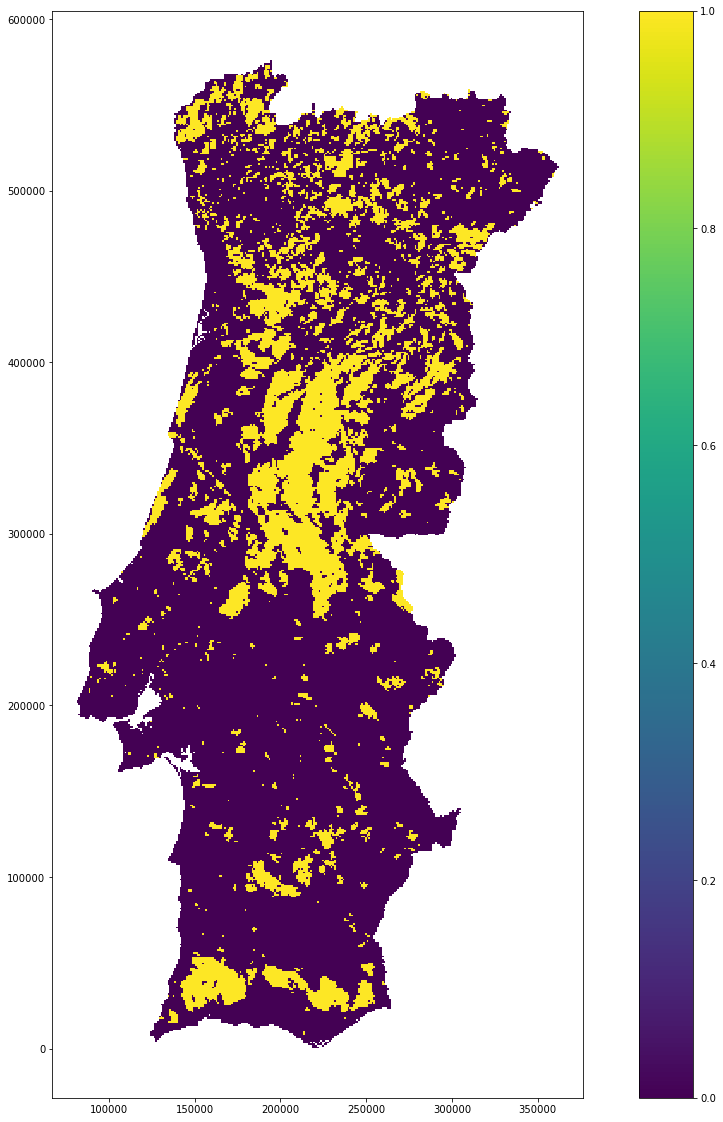

In [41]:
# visualise the final output.
# we will use the wild fire attribute just to see if there has been any mix up (because i know what it looks like).

fig, ax = plt.subplots(figsize=(20, 20))

present_cci_sdf.plot(ax=ax, 
                   legend = True,
                   column = 'mods_wf')


plt.show()

# Section : Converting our Dataset into a Graph representation.

In [42]:
# now we will represent our raster-like strucutured polygon data as a graph.

# networkx is used to build the graph
# pysal is used to define the 'edges' of the graph.
# this will be based on 'queens' contiguity

# code adapted from : RoperMaps (2017)
# found at: https://gis.stackexchange.com/questions/244576/using-geopandas-to-create-a-graph

# where inconsistencies arose, the PySal documentation was consulted:
# https://pysal.org/notebooks/lib/libpysal/weights.html

import networkx as nx
from libpysal.weights import Queen, Rook

C:\Users\trisu\AppData\Roaming\Python\Python39\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
C:\Users\trisu\AppData\Roaming\Python\Python39\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
C:\Users\trisu\AppData\Roaming\Python\Pyt

In [43]:
def networkx_graph_gen(dataframe):
    
    # generate the contiguity matrix with the id.
    contiguity_matrix = Queen.from_dataframe(dataframe, idVariable= 'id')

    # now we create a graph from the contiguity matrix
    nodes = contiguity_matrix.weights.keys() # get the unique id of the nodes.

    edges = [(node,neighbour) for node in nodes for neighbour in contiguity_matrix[node]]
    graph = nx.Graph(edges)
    
    # add the attributes to each node in the graph directly from the GeoDataFrame.

    # create a dictionary mapping ids to attributes
    attribute_dict = dataframe.set_index('id').to_dict('index')

    # add each attribute to the nodes
    for node_id in graph.nodes():

        attributes = attribute_dict.get(node_id)

        if attributes is not None:

            attributes = {k: v for k, v in attributes.items() if k not in ['block_id', 'geometry']}
            graph.nodes[node_id].update(attributes)

        # just double checking - this will pop up if something went wrong
        else:
            print(f"Node {node_id} does not have corresponding data in the dataframe.")
    
    # print the data of a node and compare it to the dataframe that we had above to see if it worked.
    print(graph.nodes[1])
    
    return(graph, contiguity_matrix)



#### Code below not required by the machine learning algorithm. It's just there to check whether the graph was built correctly. 

#### You can view the saved file against your polygons to see if the graph has been generated correctly.


#### I highly recommend that you do.


In [44]:
def write_contiguity_matrix(dataframe, contiguity_matrix, output_path):
                            
    import geopandas as gpd
    from shapely.geometry import LineString

    # calculate the centroids of your polygons
    dataframe['centroid'] = dataframe.geometry.centroid

    # initialize an empty list to store your new LineStrings
    lines = []

    # loop through the contiguity matrix
    for polygon_id, neighbors in contiguity_matrix.neighbors.items():
        for neighbor_id in neighbors:
            # Create a LineString between their centroids
            new_line = LineString([dataframe.loc[polygon_id, 'centroid'], 
                                   dataframe.loc[neighbor_id, 'centroid']])

            # append the new LineString to your list
            lines.append(new_line)

    # convert your list of LineStrings to a GeoDataFrame
    lines_gdf = gpd.GeoDataFrame(lines, columns=['geometry'])

    # set the CRS to match your original data
    lines_gdf.crs = dataframe.crs

    # save as a shapefile
    lines_gdf.to_file(current_dir + output_path , overwrite = True)


In [45]:
# finally, convert that graph into a pytorch geometric graph so that it can be ingested into the GCN model:

# code adapted from: Sparky05 (2021)
# found at: https://stackoverflow.com/questions/70452465/how-to-load-in-graph-from-networkx-into-pytorch-geometric-and-set-node-features

# bascially, pytorch likes having its labels in a specific convention.
# namely: 'x' for features and 'y' for labels.

# therefore, we will need to compress all the information into a feature vector for 'x' and the target label itself 
# will suffice for 'y'.

def pyG_graph_gen(networkX_graph): 
    
    from torch_geometric.utils import from_networkx

    # assign node attributes in the networkX graph to 'x' key

    x_attribute_title = ['hurs', 'pr', 'tas', 'tasmax', 'tasmin', 'wind', 'aspect_sin',
                          'aspect_cos','DEM', 'slope', 'rvr_pr_', 'BARE_vg', # 'BUILT_v','GRASS-M','TREES-ND'
                          'GRASS-N','SHRUBS-B', 'SHRUBS-N', 'TREES-B', 'TREES-NE']
    
    for node, row_data in networkX_graph.nodes(data=True):

        # if any value in the row corresponds to the column defined in the x_attribute_title list, then append that data to the 
        # features list:

        features = [row_data[attr] for attr in x_attribute_title]

        # this will create a feature vector (of type torch.tensor) = length of x_attr which can then be input into the pytroch 
        # graph on the 'x' attribute:


        networkX_graph.nodes[node]['x'] = torch.tensor(features, dtype=torch.float)

        # much easier for the target labels as this is just a scalar (1x1 matrix) and can directly be input into the 'y' field.

        networkX_graph.nodes[node]['y'] = row_data['mods_wf']

        # remove all the other attributes that have been put into 'x' and 'y.
        # this data will have already been stored in a suitable format

        remove_attr = [attr for attr in list(row_data.keys()) if attr not in ['x', 'y']]

        for attr in remove_attr:

            # delete this information from the node:
            del networkX_graph.nodes[node][attr]


    # save the original ids for later 
    id_map = {i: node_id for i, node_id in enumerate(networkX_graph.nodes())}

    final_graph = from_networkx(networkX_graph)
    
    return final_graph, id_map

In [46]:
# now lets run the functions:

# step 1: generate the networkX graph and retrieve the contiguity matrix:
present_cci_graph, present_cci_contiguity_matrix = networkx_graph_gen(present_cci_sdf)

# step 2 (optional): save the contiguity matrix to view in QGIS to see if you made any mistakes:
cci_present_contiguity_path = "\\Data\\outputs\\contiguity_matrix_cci.shp"
write_contiguity_matrix(present_cci_sdf, present_cci_contiguity_matrix, cci_present_contiguity_path)

# step 3: Convert the graph to a pyG graph and extract the ids for later use:
present_cci_pyg_graph, present_id_map =  pyG_graph_gen(present_cci_graph)

{'hurs': 1.0717495633698868, 'pr': 2.3359574680504975, 'tas': -1.0322968009872675, 'tasmax': -0.8428114796324938, 'tasmin': -1.3724575988302836, 'wind': -0.5388373497815124, 'aspect_sin': 1.0054665673861707, 'aspect_cos': 1.3393032317057312, 'DEM': -0.09961419798465633, 'slope': 1.715349791364174, 'rvr_pr_': -0.24092203679068516, 'BARE_vg': 0.0, 'BUILT_v': 0.0, 'GRASS-N': 0.0045371004484565805, 'SHRUBS-B': 0.0, 'SHRUBS-N': 0.0, 'TREES-B': 6.674888009603075, 'TREES-ND': 0.0, 'TREES-NE': 0.0, 'mods_wf': 0.0}


In [47]:
# Now we have a sneak-peak at the graph structure.

print(f'Number of nodes: {present_cci_pyg_graph.num_nodes}')
print(f'Number of edges: {present_cci_pyg_graph.num_edges}')
print(f'Number of features: {present_cci_pyg_graph.num_features}')


Number of nodes: 88760
Number of edges: 702960
Number of features: 17


In [48]:
x = present_cci_pyg_graph.x
print(x)

y = present_cci_pyg_graph.y
print(y)

# graph generation = done

tensor([[ 1.0760,  2.3101, -1.0308,  ...,  0.0000,  7.4216,  0.0000],
        [ 1.0717,  2.3360, -1.0323,  ...,  0.0000,  6.6749,  0.0000],
        [ 1.0795,  2.4251, -1.0327,  ...,  0.0000,  7.3981,  0.0000],
        ...,
        [ 0.6295, -0.6425,  0.4992,  ...,  0.0000, -0.0388,  0.0000],
        [ 0.6235, -0.6412,  0.5060,  ...,  0.0000,  0.1249,  0.0000],
        [ 0.6180, -0.6392,  0.5122,  ...,  0.0000,  0.0513,  0.0000]])
tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [49]:
present_cci_pyg_graph.edge_index

tensor([[    0,     1,     1,  ..., 88758, 88759, 88759],
        [    1,     0,     2,  ..., 88759, 88754, 88758]])

We can see some places in the borders of the country that actually have very few cells within their respective blocks. If we perform a random split on the blocks and end up having to train, validate or test such low number of cells, it could be detrimental. Therefore, we will define a threshold in which if a block has < the threshold, then the cells in that block will be assigned to the block which shares the longest border with the cell. 

# Section 4: Graph Convolution Network.


#### The GCN model below took inspiration from 2 primary sources :

1. DeepFindr (2020) - Youtube videos on the theory of GCNS and tutorials on how to implement this in python:

video = https://www.youtube.com/watch?v=ex2qllcVneY&list=PLV8yxwGOxvvoNkzPfCx2i8an--Tkt7O8Z&index=4
code tutorial = https://colab.research.google.com/drive/1LJir3T6M6Omc2Vn2GV2cDW_GV2YfI53_?usp=sharing#scrollTo=jNsToorfSgS0
        
2. Bourke, Daniel (No date) - https://www.learnpytorch.io/02_pytorch_classification/

In [50]:
# set the seed for reproducibility
# https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/seed.html

from torch_geometric.seed import seed_everything

seed_everything(7)

In [51]:
# because the train-test-validation sets have been determined through blocking, we will need to access the indicies of the ids
# that correspond to these blocks to let the algorithm know which instances fall in which set.

train_indices = present_cci_sdf[present_cci_sdf['block_id'].isin(train_block)]['id'].to_list()
test_indices = present_cci_sdf[present_cci_sdf['block_id'].isin(test_block)]['id'].to_list()
val_indices = present_cci_sdf[present_cci_sdf['block_id'].isin(validation_block)]['id'].to_list()


In [52]:

# when we train the GCN model, the validation and test set nodes are hidden from the algorithm.
# therefore, the gradients and weights during training will only be computed for the training set.

# however, when we want to evaluate or test the model, we want to ensure that there is no information being leaked from the 
# training set to the validation or test set.
# what this means is that because the data is already available during training, the nodes in the validation or test set
# can be influenced by this neighbourhood training node information depending on the size of the convolutions.

# essentially, we want it so that nodes in the validation and test they are treated like islands relative to other sets
# to prevent this information being leaked. This will prevent an artificial inflation in the performance of the model.

# imagine this: we have a training node which is 'on fire'. Now, right next to that is a validation or test set node which we
# want to classify. Due to Tobler's law of geography (where close objects are simmilar to each other), you can expect them to have
# very similar values in the features, as well as the fact that they are most likely on fire.
# Now of course, since the training set information is available and the size of the convolution goes outside of the validation
# or test set block, it may use this information to predict the value in the node.
# so its not really an unseen data point because it can see the neighbours values! therefore, we get a very optimistic output.

# this can be achieved by singling out the edge indices for the validation and test set and masking all other edge indices.

# we will masks for the validation and test set
val_mask = torch.zeros(present_cci_pyg_graph.num_nodes, dtype=bool)
val_mask[val_indices] = True

test_mask = torch.zeros(present_cci_pyg_graph.num_nodes, dtype=bool)
test_mask[test_indices] = True

# Create edge masks for the validation and test sets
val_edge_mask = val_mask[present_cci_pyg_graph.edge_index[0]] & val_mask[present_cci_pyg_graph.edge_index[1]]
test_edge_mask = test_mask[present_cci_pyg_graph.edge_index[0]] & test_mask[present_cci_pyg_graph.edge_index[1]]

# Use the masks to get edge indices for validation and testing
val_edge_indices = present_cci_pyg_graph.edge_index[:, val_edge_mask]
test_edge_indices = present_cci_pyg_graph.edge_index[:, test_edge_mask]



In [53]:
class GCN(torch.nn.Module):
    
    def __init__(self, graph):
        super(GCN, self).__init__()
        

        # initialize the layers
        # initialize the layers
        self.conv1 = GCNConv(graph.num_features, 50) # 1 km radius
        self.conv2 = GCNConv(50, 50) # 3 km radius
        self.conv3 = GCNConv(50, 30) # 5 km radius
        self.conv4 = GCNConv(30, 30) # 7 km radius
        self.conv5 = GCNConv(30, 12) # 9 km radius


        self.out = Linear(12, 1)  # Changed to 1 for binary classification

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        
        x = self.conv3(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        
        x = self.conv4(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        
        x = self.conv5(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        
        
        x = self.out(x) 
        
        return x 

# Create your model
model = GCN(present_cci_pyg_graph)

print(model)

GCN(
  (conv1): GCNConv(17, 50)
  (conv2): GCNConv(50, 50)
  (conv3): GCNConv(50, 30)
  (conv4): GCNConv(30, 30)
  (conv5): GCNConv(30, 12)
  (out): Linear(in_features=12, out_features=1, bias=True)
)


In [54]:
# for debugging.
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [55]:
# weighted loss function:
# most ML algorithms assume that the target labels are equally represented.
# However, our data is severly imbalanced, with the presence of wildfires being significantly lower 
# (< 20% of total observations) than no wildfires (> 80% total).
# common approaches to deal with imbalanced datasets = over or under sampling methods.
# however, we cannot employ these methods because we are using a graph neural network.
# i.e. our graph has a fixed structure. Removing or adding more instances will only mess this up.

# Therefore, we will employ a weighted loss function.
# code and the idea came from  Tantai (2023), 
# found at: https://medium.com/@zergtant/use-weighted-loss-function-to-solve-imbalanced-data-classification-problems-749237f38b75#:~:text=A%20weighted%20loss%20function%20assigns,improved%20performance%20on%20imbalanced%20datasets.


# first get the class labels
train_classes = present_cci_sdf[present_cci_sdf['block_id'].isin(train_block)]['mods_wf'].to_list()

# convert the list to a tensor so that it can be used by pyTorch's functions
train_classes = torch.tensor(train_classes)

# get the sum of the instances which have label = 1 ('fire') and 0 ('no fire')
fire = torch.sum(train_classes == 1).item()
no_fire = torch.sum(train_classes == 0).item()


# simple weight variable calculated by dividing the number of negative classes by the number of positive classes.
pos_weights = torch.tensor([no_fire/fire])

print(pos_weights)



tensor([3.6898])


In [56]:
# our processing will be done on the gpu because this will significantly improve processing time. 
# check if the gpu is available - if it is, use it and if its not, use the cpu.
device =  "cuda" if torch.cuda.is_available() else "cpu"
#device = "cpu"
torch.backends.cudnn.benchmark = True
print(f'Device: {device}')

# lets put all our data on the GPU for processing:

# the model 
model = model.to(device)

# the graph of our AOI that we created earlier.
present_cci_pyg_graph = present_cci_pyg_graph.to(device)

# the train-test-validation indices so that we can seperate them during training:
train_indices = torch.tensor(train_indices, dtype=torch.long).to(device)
test_indices = torch.tensor(test_indices, dtype=torch.long).to(device)
val_indices = torch.tensor(val_indices, dtype=torch.long).to(device)

# the edge indices
val_edge_indices = torch.tensor(val_edge_indices, dtype=torch.long).to(device)
test_edge_indices = torch.tensor(test_edge_indices, dtype=torch.long).to(device)

# the weights for the weighted loss function.
pos_weights = pos_weights.to(device)

Device: cuda


C:\Users\trisu\AppData\Local\Temp\ipykernel_44680\1735027181.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_edge_indices = torch.tensor(val_edge_indices, dtype=torch.long).to(device)
C:\Users\trisu\AppData\Local\Temp\ipykernel_44680\1735027181.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_edge_indices = torch.tensor(test_edge_indices, dtype=torch.long).to(device)


In [57]:
# early stopping:
# code by isle_of_gods (2022)
# found at https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch

class EarlyStopper:
    
    def __init__(self, patience=1, min_delta=0):
        
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    
    def early_stop(self, validation_loss):
        
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            
            self.counter += 1
            
            if self.counter >= self.patience:
                return True
        
        return False

In [58]:
# initialize Optimizer with learning rateand decay
optimizer = torch.optim.AdamW(model.parameters(),
                              lr=0.0005, # learning rate
                              weight_decay=5e-6) # weight decay - weight_decay=5e-4

# define loss function Binary cross entropy loss for binary classification problems.
# we will also input our weights for the class imbalance into the pos_weight argument.
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weights) # pos_weight=pos_weight

# empty list to contain all the loss.
losses = []

# define a function to calculate the accuracy:
def acc_func(y_pred, ys):
    
    # check which prediction is equal to the actual label and then obtain the sum
    correct = np.sum(y_pred == ys)
    
    # after that, divide the number of correct predictions by the total number of y class labels.
    acc = correct / ys.shape[0]
    
    return acc * 100

In [59]:
epochs = 10001

from sklearn.metrics import roc_auc_score, average_precision_score

train_loss_list = []
val_loss_list = []
count = []

train_roc_auc_list = []
val_roc_auc_list = []

train_pr_auc_list = []
val_pr_auc_list = []

# initialise the early stopper class
early_stopper = EarlyStopper(patience=100, min_delta=0.01)

# TRAINING LOOP:
for e in range(epochs):
  
    # Go into training mode.
    model.train()

    # Step 1: forward pass.
    logits_train = model(present_cci_pyg_graph.x, present_cci_pyg_graph.edge_index).squeeze()[train_indices]
    train_ys_prob = torch.sigmoid(logits_train)  # Probabilities for ROC-AUC

    # Step 2: calculate loss and accuracy
    train_loss = criterion(logits_train, present_cci_pyg_graph.y[train_indices].float()) # upgraded to weighted loss

    # Calculate train roc-auc and pr-auc
    train_roc_auc = roc_auc_score(present_cci_pyg_graph.y[train_indices].cpu().numpy(), train_ys_prob.cpu().detach().numpy())
    train_pr_auc = average_precision_score(present_cci_pyg_graph.y[train_indices].cpu().numpy(), train_ys_prob.cpu().detach().numpy())
    
    # Step 3: optimizer zero gradient.
    optimizer.zero_grad()

    # Step 4: loss back-propagation.
    train_loss.backward()
    
    # Step 5: optimizer step.
    optimizer.step()

    # Step 6: model evaluation on validation set.
    model.eval()
    
    with torch.no_grad():
        
        logits_val = model(present_cci_pyg_graph.x, val_edge_indices).squeeze()[val_indices]
        val_ys_prob = torch.sigmoid(logits_val) # use the sigmoid function to calculate probabilities

        # calculate loss
        val_loss = criterion(logits_val, present_cci_pyg_graph.y[val_indices].float())

        # Calculate validation ROC-AUC and PR-AUC
        val_roc_auc = roc_auc_score(present_cci_pyg_graph.y[val_indices].cpu().numpy(), val_ys_prob.cpu().detach().numpy())
        val_pr_auc = average_precision_score(present_cci_pyg_graph.y[val_indices].cpu().numpy(), val_ys_prob.cpu().detach().numpy())
        
        # break out of the training loop if the early stopper has been triggered after the validation loss has been calculated.
        if early_stopper.early_stop(val_loss.cpu().detach().numpy()):
                
            print("\nEarly stopping triggered!\n")
                
            break
            
        # print message:
        if e % 10 == 0:
            print(f"\nEpoch ({e}/{epochs})")
            print(f"Training set:     Loss {train_loss:.5f}  |  ROC-AUC: {train_roc_auc:.2f} |  PR-AUC: {train_pr_auc:.2f}")
            print(f"Validation set:   Loss {val_loss:.5f} |  ROC-AUC: {val_roc_auc:.2f} |  PR-AUC: {val_pr_auc:.2f}")
            
    # for plotting
    count.append(e) # storing the epoch 
    
    train_loss_list.append(train_loss.cpu().detach().numpy())
    train_roc_auc_list.append(train_roc_auc)
    train_pr_auc_list.append(train_pr_auc)
    
    val_loss_list.append(val_loss.cpu().detach().numpy())
    val_roc_auc_list.append(val_roc_auc)
    val_pr_auc_list.append(val_pr_auc)


Epoch (0/10001)
Training set:     Loss 1.19621  |  ROC-AUC: 0.36 |  PR-AUC: 0.16
Validation set:   Loss 1.15779 |  ROC-AUC: 0.25 |  PR-AUC: 0.13

Epoch (10/10001)
Training set:     Loss 1.09249  |  ROC-AUC: 0.56 |  PR-AUC: 0.26
Validation set:   Loss 1.06151 |  ROC-AUC: 0.64 |  PR-AUC: 0.28

Epoch (20/10001)
Training set:     Loss 1.04799  |  ROC-AUC: 0.66 |  PR-AUC: 0.34
Validation set:   Loss 1.00567 |  ROC-AUC: 0.73 |  PR-AUC: 0.39

Epoch (30/10001)
Training set:     Loss 1.01205  |  ROC-AUC: 0.69 |  PR-AUC: 0.37
Validation set:   Loss 0.95671 |  ROC-AUC: 0.74 |  PR-AUC: 0.41

Epoch (40/10001)
Training set:     Loss 0.98612  |  ROC-AUC: 0.71 |  PR-AUC: 0.40
Validation set:   Loss 0.92082 |  ROC-AUC: 0.76 |  PR-AUC: 0.43

Epoch (50/10001)
Training set:     Loss 0.96427  |  ROC-AUC: 0.73 |  PR-AUC: 0.41
Validation set:   Loss 0.89702 |  ROC-AUC: 0.77 |  PR-AUC: 0.46

Epoch (60/10001)
Training set:     Loss 0.95265  |  ROC-AUC: 0.74 |  PR-AUC: 0.43
Validation set:   Loss 0.88166 |  RO


Epoch (560/10001)
Training set:     Loss 0.80586  |  ROC-AUC: 0.83 |  PR-AUC: 0.57
Validation set:   Loss 0.81732 |  ROC-AUC: 0.82 |  PR-AUC: 0.57

Epoch (570/10001)
Training set:     Loss 0.81370  |  ROC-AUC: 0.83 |  PR-AUC: 0.56
Validation set:   Loss 0.81725 |  ROC-AUC: 0.82 |  PR-AUC: 0.57

Epoch (580/10001)
Training set:     Loss 0.80861  |  ROC-AUC: 0.83 |  PR-AUC: 0.57
Validation set:   Loss 0.81481 |  ROC-AUC: 0.82 |  PR-AUC: 0.57

Epoch (590/10001)
Training set:     Loss 0.81118  |  ROC-AUC: 0.83 |  PR-AUC: 0.56
Validation set:   Loss 0.81250 |  ROC-AUC: 0.82 |  PR-AUC: 0.57

Epoch (600/10001)
Training set:     Loss 0.80408  |  ROC-AUC: 0.83 |  PR-AUC: 0.56
Validation set:   Loss 0.81328 |  ROC-AUC: 0.82 |  PR-AUC: 0.57

Epoch (610/10001)
Training set:     Loss 0.80496  |  ROC-AUC: 0.83 |  PR-AUC: 0.57
Validation set:   Loss 0.81339 |  ROC-AUC: 0.82 |  PR-AUC: 0.58

Epoch (620/10001)
Training set:     Loss 0.79893  |  ROC-AUC: 0.83 |  PR-AUC: 0.58
Validation set:   Loss 0.813


Epoch (1120/10001)
Training set:     Loss 0.75841  |  ROC-AUC: 0.85 |  PR-AUC: 0.61
Validation set:   Loss 0.79705 |  ROC-AUC: 0.83 |  PR-AUC: 0.60

Epoch (1130/10001)
Training set:     Loss 0.76186  |  ROC-AUC: 0.85 |  PR-AUC: 0.61
Validation set:   Loss 0.79669 |  ROC-AUC: 0.83 |  PR-AUC: 0.60

Epoch (1140/10001)
Training set:     Loss 0.75471  |  ROC-AUC: 0.85 |  PR-AUC: 0.62
Validation set:   Loss 0.79656 |  ROC-AUC: 0.83 |  PR-AUC: 0.60

Epoch (1150/10001)
Training set:     Loss 0.76417  |  ROC-AUC: 0.85 |  PR-AUC: 0.61
Validation set:   Loss 0.79555 |  ROC-AUC: 0.83 |  PR-AUC: 0.60

Epoch (1160/10001)
Training set:     Loss 0.75840  |  ROC-AUC: 0.85 |  PR-AUC: 0.61
Validation set:   Loss 0.79528 |  ROC-AUC: 0.83 |  PR-AUC: 0.60

Epoch (1170/10001)
Training set:     Loss 0.76530  |  ROC-AUC: 0.85 |  PR-AUC: 0.61
Validation set:   Loss 0.79442 |  ROC-AUC: 0.83 |  PR-AUC: 0.60

Epoch (1180/10001)
Training set:     Loss 0.75103  |  ROC-AUC: 0.85 |  PR-AUC: 0.62
Validation set:   Los


Epoch (1670/10001)
Training set:     Loss 0.73188  |  ROC-AUC: 0.86 |  PR-AUC: 0.64
Validation set:   Loss 0.79199 |  ROC-AUC: 0.84 |  PR-AUC: 0.62

Epoch (1680/10001)
Training set:     Loss 0.72754  |  ROC-AUC: 0.86 |  PR-AUC: 0.64
Validation set:   Loss 0.79043 |  ROC-AUC: 0.84 |  PR-AUC: 0.62

Epoch (1690/10001)
Training set:     Loss 0.72619  |  ROC-AUC: 0.87 |  PR-AUC: 0.64
Validation set:   Loss 0.79093 |  ROC-AUC: 0.84 |  PR-AUC: 0.63

Epoch (1700/10001)
Training set:     Loss 0.71985  |  ROC-AUC: 0.87 |  PR-AUC: 0.65
Validation set:   Loss 0.79143 |  ROC-AUC: 0.84 |  PR-AUC: 0.62

Epoch (1710/10001)
Training set:     Loss 0.72645  |  ROC-AUC: 0.87 |  PR-AUC: 0.64
Validation set:   Loss 0.78999 |  ROC-AUC: 0.84 |  PR-AUC: 0.63

Epoch (1720/10001)
Training set:     Loss 0.72235  |  ROC-AUC: 0.87 |  PR-AUC: 0.65
Validation set:   Loss 0.79189 |  ROC-AUC: 0.84 |  PR-AUC: 0.63

Epoch (1730/10001)
Training set:     Loss 0.72320  |  ROC-AUC: 0.87 |  PR-AUC: 0.64
Validation set:   Los


Epoch (2220/10001)
Training set:     Loss 0.70757  |  ROC-AUC: 0.87 |  PR-AUC: 0.67
Validation set:   Loss 0.79380 |  ROC-AUC: 0.84 |  PR-AUC: 0.63

Epoch (2230/10001)
Training set:     Loss 0.70771  |  ROC-AUC: 0.87 |  PR-AUC: 0.66
Validation set:   Loss 0.79444 |  ROC-AUC: 0.84 |  PR-AUC: 0.63

Epoch (2240/10001)
Training set:     Loss 0.70795  |  ROC-AUC: 0.87 |  PR-AUC: 0.67
Validation set:   Loss 0.79244 |  ROC-AUC: 0.84 |  PR-AUC: 0.63

Epoch (2250/10001)
Training set:     Loss 0.70450  |  ROC-AUC: 0.87 |  PR-AUC: 0.66
Validation set:   Loss 0.79438 |  ROC-AUC: 0.84 |  PR-AUC: 0.63

Epoch (2260/10001)
Training set:     Loss 0.70030  |  ROC-AUC: 0.88 |  PR-AUC: 0.67
Validation set:   Loss 0.79299 |  ROC-AUC: 0.84 |  PR-AUC: 0.63

Epoch (2270/10001)
Training set:     Loss 0.70147  |  ROC-AUC: 0.88 |  PR-AUC: 0.66
Validation set:   Loss 0.79391 |  ROC-AUC: 0.84 |  PR-AUC: 0.63

Epoch (2280/10001)
Training set:     Loss 0.69801  |  ROC-AUC: 0.88 |  PR-AUC: 0.67
Validation set:   Los


Epoch (2770/10001)
Training set:     Loss 0.68338  |  ROC-AUC: 0.88 |  PR-AUC: 0.69
Validation set:   Loss 0.79867 |  ROC-AUC: 0.84 |  PR-AUC: 0.64

Epoch (2780/10001)
Training set:     Loss 0.68372  |  ROC-AUC: 0.88 |  PR-AUC: 0.68
Validation set:   Loss 0.79758 |  ROC-AUC: 0.84 |  PR-AUC: 0.64

Epoch (2790/10001)
Training set:     Loss 0.68282  |  ROC-AUC: 0.88 |  PR-AUC: 0.68
Validation set:   Loss 0.79506 |  ROC-AUC: 0.84 |  PR-AUC: 0.64

Epoch (2800/10001)
Training set:     Loss 0.68177  |  ROC-AUC: 0.88 |  PR-AUC: 0.68
Validation set:   Loss 0.79626 |  ROC-AUC: 0.84 |  PR-AUC: 0.64

Epoch (2810/10001)
Training set:     Loss 0.68771  |  ROC-AUC: 0.88 |  PR-AUC: 0.68
Validation set:   Loss 0.79682 |  ROC-AUC: 0.84 |  PR-AUC: 0.64

Epoch (2820/10001)
Training set:     Loss 0.68146  |  ROC-AUC: 0.88 |  PR-AUC: 0.68
Validation set:   Loss 0.79819 |  ROC-AUC: 0.84 |  PR-AUC: 0.64

Epoch (2830/10001)
Training set:     Loss 0.67493  |  ROC-AUC: 0.88 |  PR-AUC: 0.69
Validation set:   Los

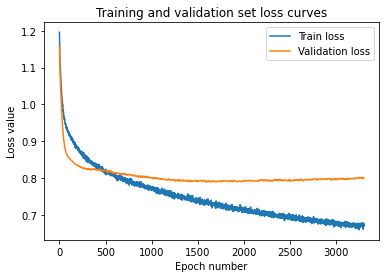

In [60]:
# plotting the loss curves:

plt.plot(count, train_loss_list, label="Train loss")
plt.plot(count, val_loss_list, label="Validation loss")
plt.title("Training and validation set loss curves")
plt.ylabel("Loss value")
plt.xlabel("Epoch number")
plt.legend();

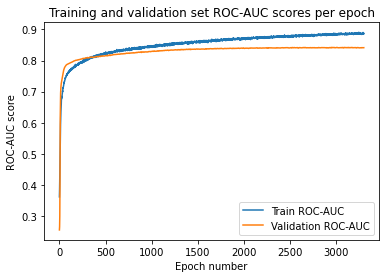

In [61]:
# plotting the ROC-AUC curves:

plt.plot(count, train_roc_auc_list, label="Train ROC-AUC")
plt.plot(count, val_roc_auc_list, label="Validation ROC-AUC")
plt.title("Training and validation set ROC-AUC scores per epoch")
plt.ylabel("ROC-AUC score")
plt.xlabel("Epoch number")
plt.legend();

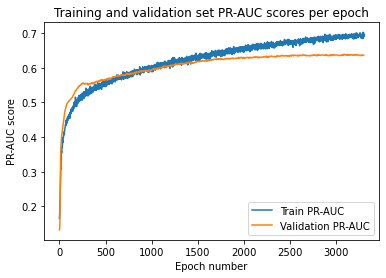

In [62]:
# plotting the loss curves:

plt.plot(count, train_pr_auc_list, label="Train PR-AUC")
plt.plot(count, val_pr_auc_list, label="Validation PR-AUC")
plt.title("Training and validation set PR-AUC scores per epoch")
plt.ylabel("PR-AUC score")
plt.xlabel("Epoch number")
plt.legend();

In [63]:
def ROC_AUC_plot(val_true, val_pp):
    
    from sklearn.metrics import roc_curve, auc
    
    FPR, TPR, thresholds = roc_curve(val_true, val_pp)
    roc_auc = auc(FPR, TPR)
    
    # now plot it 
    plt.figure()
    plt.plot(FPR, TPR,  lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    

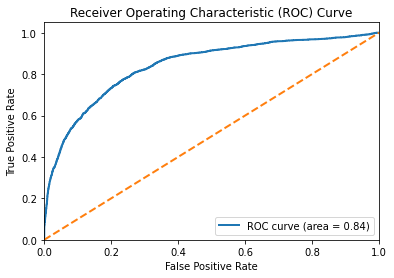

In [64]:
# plot the ROC-AUC for our validation set to determine the threshold
# first put the data on the cpu because it'll spit out an error saying numpy doesn't work on the GPU.
val_ys_prob = val_ys_prob.cpu().detach().numpy()
val_true = present_cci_pyg_graph.y[val_indices].cpu()

ROC_AUC_plot(val_true,val_ys_prob)

In [165]:
# further evaluation:

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def evaluation_metrics_calculator(true, pred):
    
    # Precision
    precision = precision_score(true, pred)
    print(f"\nPrecision: {precision:.4f}")

    # Recall
    recall = recall_score(true, pred)
    print(f"Recall: {recall:.4f}")
    
    # lets get the specificity
    TN, FP, FN, TP = confusion_matrix(true, pred).ravel()
    specificity = TN / (TN + FP)
    print(f"Specificity: {specificity:.4f}")

    # F1 Score
    f1 = f1_score(true, pred)
    print(f"\nF1 Score: {f1:.4f}")

    # Confusion Matrix as percentages

    conf_matrix = confusion_matrix(true, pred)
    
    # convert he matrix to type float and then find the sum across each row.
    # because remember each row represents a class label and the sum of the values across each row = sum of observations 
    # for that class.
    conf_matrix_perc = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    conf_matrix_perc = conf_matrix_perc * 100
    
    
    print("\nConfusion Matrix:")
    
    # visualize the confusion matrix

    schematic = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_perc, 
                                       display_labels=[0, 1])
    
    fig, ax = plt.subplots()
    schematic.plot(cmap=plt.cm.Greens, ax=ax)
    
    for text in ax.texts:
        text.set_size(20)
    
    # adjust font size 
    ax.set_xlabel('Predicted label', fontsize=16)
    ax.set_ylabel('True label', fontsize=16)

    ax.tick_params(axis='both', which='major', labelsize=16)
    
    plt.show()



In [166]:
def binarize(prob_array, threshold):
    
    # Convert probabilities to binary predictions based on the threshold
    binary_prediction = (prob_array > threshold).astype(int)
    
    return binary_prediction


Train set evaluation:

ROC-AUC: 0.8858912628288637

Accuracy of train set : 76.29

Precision: 0.4695
Recall: 0.8752
Specificity: 0.7325

F1 Score: 0.6111

Confusion Matrix:


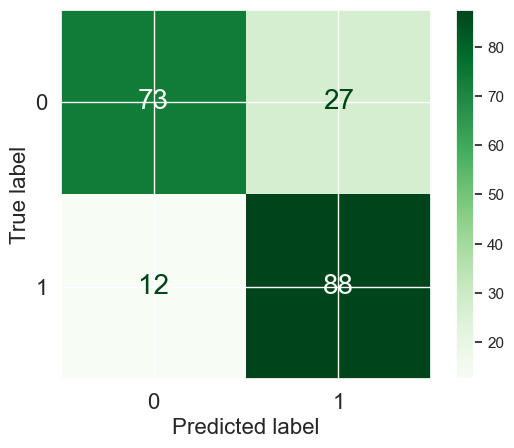

In [167]:
# evaluation on training set:
# first put the data on the cpu because it'll spit out an error saying numpy doesn't work on the GPU.

train_ys_prob = torch.tensor(train_ys_prob).clone().detach().cpu().numpy()
train_ys_pred = binarize(train_ys_prob, 0.4)   # because the true predictions are attached to the gradient
train_true = present_cci_pyg_graph.y[train_indices].cpu().numpy()

# calculate accuracy
train_acc = acc_func(train_ys_pred, train_true)


print("Train set evaluation:\n")

print (f"ROC-AUC: {train_roc_auc}")

print(f"\nAccuracy of train set : {train_acc:.2f}")

evaluation_metrics_calculator(true = train_true, 
                              pred = train_ys_pred)


Validation set evaluation:

ROC-AUC: 0.8412704009919998

Accuracy of validation set : 74.64

Precision: 0.4307
Recall: 0.8064
Specificity: 0.7313

F1 Score: 0.5615

Confusion Matrix:


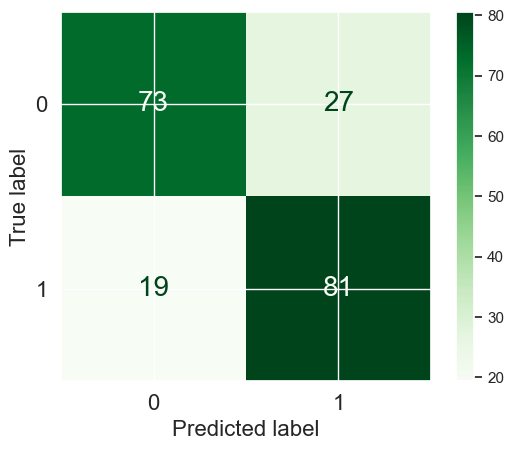

In [168]:

# evaluation on validation set:

val_ys_pred = binarize(val_ys_prob, 0.4)

val_true = present_cci_pyg_graph.y[val_indices].cpu().numpy()

# compute accuracy:
val_acc = acc_func(val_ys_pred, val_true)

print("Validation set evaluation:\n")

print (f"ROC-AUC: {val_roc_auc}")

print(f"\nAccuracy of validation set : {val_acc:.2f}")

evaluation_metrics_calculator(true = val_true , 
                              pred = val_ys_pred)

ROC-AUC: 0.8667635967201403
Test set evaluation:

Accuracy of test set : 75.42

Precision: 0.4801
Recall: 0.8417
Specificity: 0.7281

F1 Score: 0.6114

Confusion Matrix:


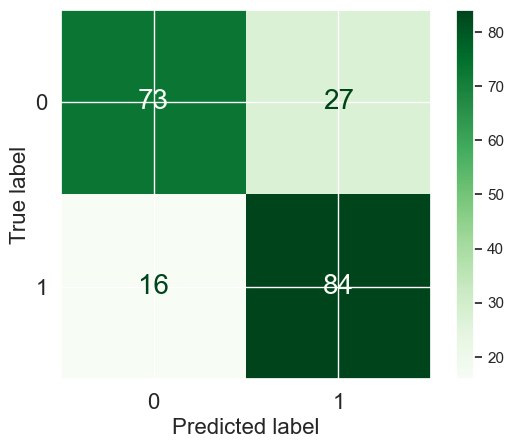

In [169]:

# test set:

# set your model to evaluation mode
model.eval()

# make predictions on your new data using your loaded model

with torch.no_grad():
    
    logits_test = model(present_cci_pyg_graph.x, test_edge_indices).squeeze()[test_indices]
    test_ys_prob = torch.sigmoid(logits_test) # use the sigmoid function to calculate probabilities

        
    # Calculate validation roc-auc
    test_roc_auc = roc_auc_score(present_cci_pyg_graph.y[test_indices].cpu().numpy(), test_ys_prob.cpu().detach().numpy())
    test_pr_auc = average_precision_score(present_cci_pyg_graph.y[test_indices].cpu().numpy(), test_ys_prob.cpu().detach().numpy())
        
# convert the predictions tensor to a numpy array

print (f"ROC-AUC: {test_roc_auc}")
test_ys_prob = test_ys_prob.cpu().detach().numpy()
test_ys_pred = binarize(test_ys_prob, 0.4)
test_true = present_cci_pyg_graph.y[test_indices].cpu().numpy()


# calculate accuracy
test_acc = acc_func(test_ys_pred, test_true)

print("Test set evaluation:")

print(f"\nAccuracy of test set : {test_acc:.2f}")

evaluation_metrics_calculator(true = test_true, 
                              pred = test_ys_pred)




In [70]:
# USING CURRET DATA TO OBSERVE FIRE TRENDS

model.eval()  

with torch.no_grad(): 
    
    # calculate the logits
    logits_new = model(present_cci_pyg_graph.x, present_cci_pyg_graph.edge_index).squeeze()
    
    # convert the logits to probabilities - this will be intrepreted as prediction probabilities for wildfire susceptibility
    prediction_probabilities = torch.sigmoid(logits_new).cpu().numpy()
    


In [71]:
print(len(prediction_probabilities))

88760


In [72]:
# lets recreate the dataframe with just the prediction probabilities and the ids saved earlier
df_pred = pd.DataFrame({
    'id': [present_id_map[i] for i in range(len(prediction_probabilities))],
    'probability': prediction_probabilities
})

In [73]:
df_pred.head()

,id,probability
0,0,0.590668
1,1,0.680052
2,5,0.767581
3,6,0.744392
4,2,0.598166


In [74]:
# now we attach this to the original dataframe using a left join
# they will be mapped to the ids

final = present_cci_sdf_dup.merge(df_pred, on='id', how='left')

In [75]:
# save it outside for QGIS

final.to_file(current_dir + "\\Data\\outputs\\present_cci_output" , overwrite = True)


C:\Users\trisu\AppData\Local\Temp\ipykernel_44680\1022998000.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  final.to_file(current_dir + "\\Data\\outputs\\present_cci_output" , overwrite = True)


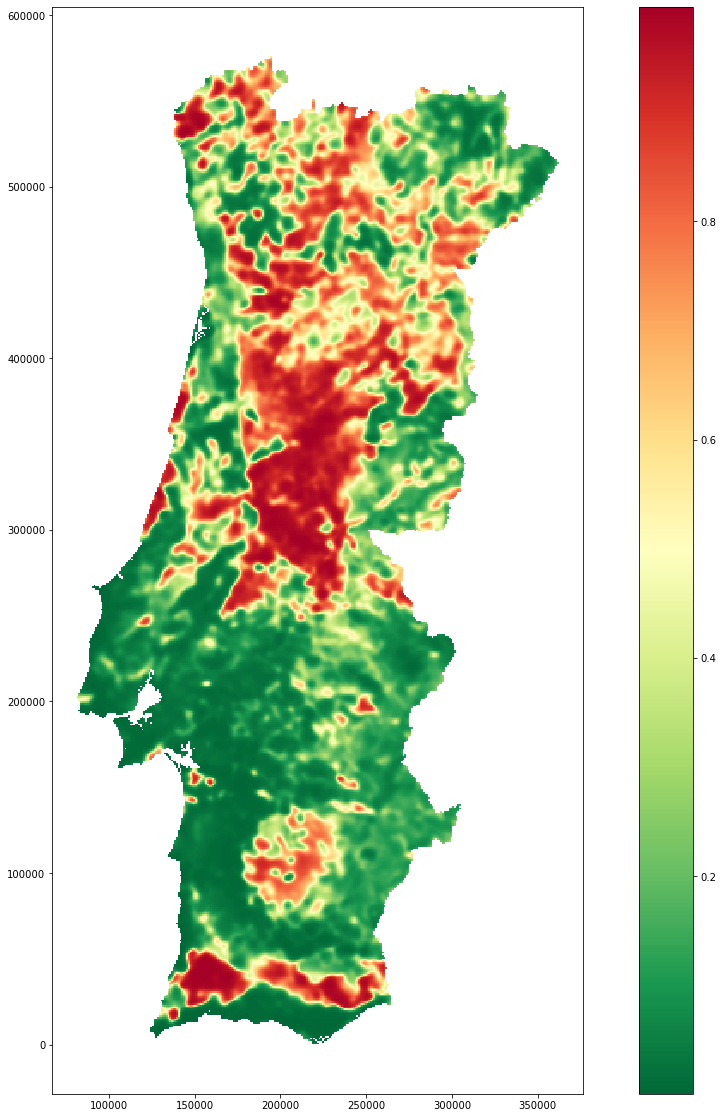

In [76]:
# visualise the final output

fig, ax = plt.subplots(figsize=(20, 20))

final.plot(ax=ax,
           legend = True,
           column = 'probability',
          cmap='RdYlGn_r')


plt.show()

# Some simple analysis

In [77]:
# define the bins for susceptibility
bins = [0, 0.20, 0.40, 0.60, 0.80, 1]

# define labels
labels = ["Very Low", "Low", "Medium", "High", "Very High"]

# create the new column
final['susceptibility'] = pd.cut(final['probability'], bins=bins, labels=labels, include_lowest=True)
final.head()

,id,hurs,pr,tas,tasmax,tasmin,wind,DEM,slope,rvr_pr_,...,SHRUBS-N,TREES-B,TREES-ND,TREES-NE,mods_wf,geometry,aspect_sin,aspect_cos,probability,susceptibility
0,0,73.560760,2.169590,18.130964,23.410049,13.025126,1.904126,82.986618,14.933476,74.257401,...,0.0,57.338844,0.0,0.0,0.0,"POLYGON ((194175.268 576088.229, 195175.268 57...",0.411631,-0.911351,0.590668,Medium
1,1,73.502945,2.185008,18.126665,23.402647,13.014404,1.894524,204.336868,16.949665,318.608276,...,0.0,51.607616,0.0,0.0,0.0,"POLYGON ((194175.268 575088.229, 195175.268 57...",0.743156,-0.669118,0.680052,High
2,2,74.069092,2.334696,18.180401,23.349270,13.158223,1.938224,159.530380,12.910676,513.545715,...,0.0,55.888813,0.0,0.0,0.0,"POLYGON ((190175.268 574088.229, 191175.268 57...",0.796179,-0.605061,0.598166,Medium
3,3,73.925247,2.307390,18.158123,23.350735,13.114095,1.925053,145.060379,17.142456,358.473694,...,0.0,59.576244,0.0,0.0,0.0,"POLYGON ((191175.268 574088.229, 192175.268 57...",0.960941,-0.276754,0.660608,High
4,4,73.770706,2.274770,18.140078,23.358360,13.072411,1.911581,123.798340,16.550346,152.072922,...,0.0,66.023468,0.0,0.0,0.0,"POLYGON ((192175.268 574088.229, 193175.268 57...",0.590976,-0.806689,0.717317,High


In [116]:
# let's calculate the area of fire susceptibility for each category:
category_counts = final['susceptibility'].value_counts()

print(category_counts)

Very Low     40942
Very High    14574
Low          13056
High         10559
Medium        9629
Name: susceptibility, dtype: int64


hurs


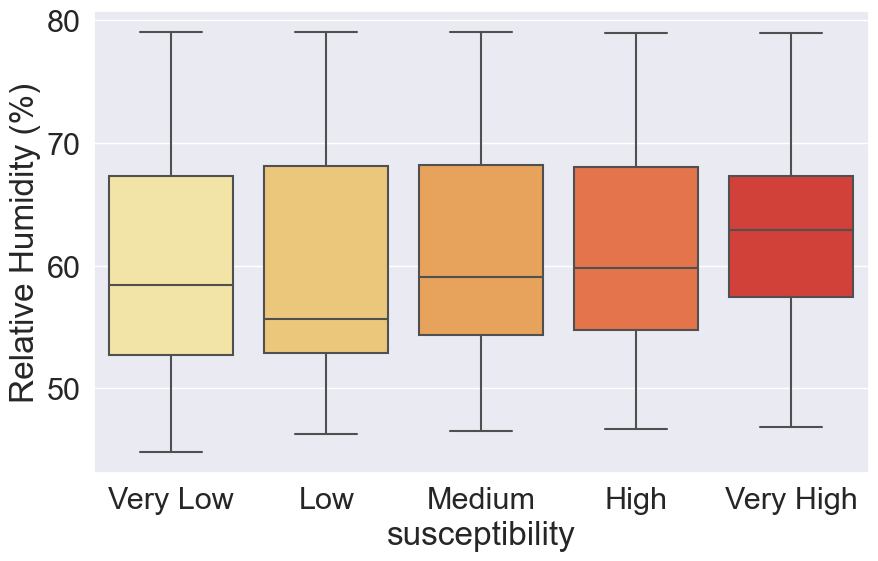

pr


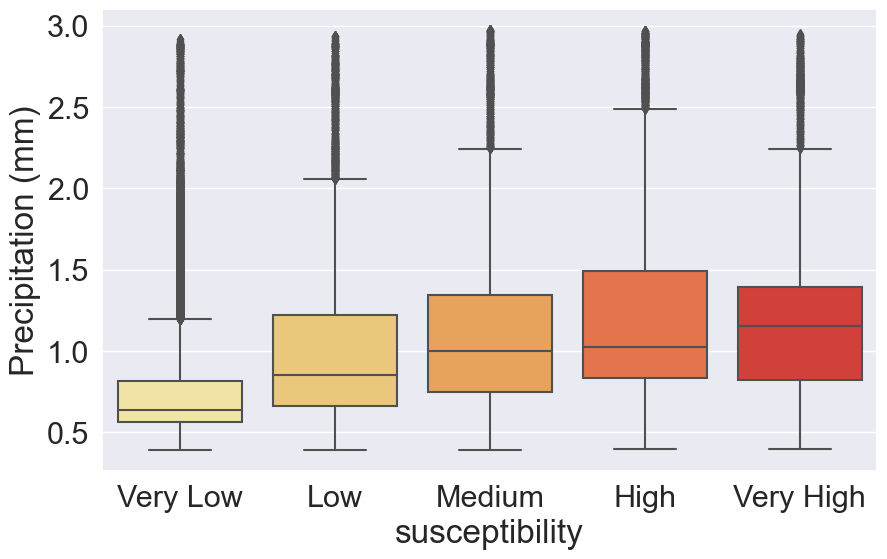

tas


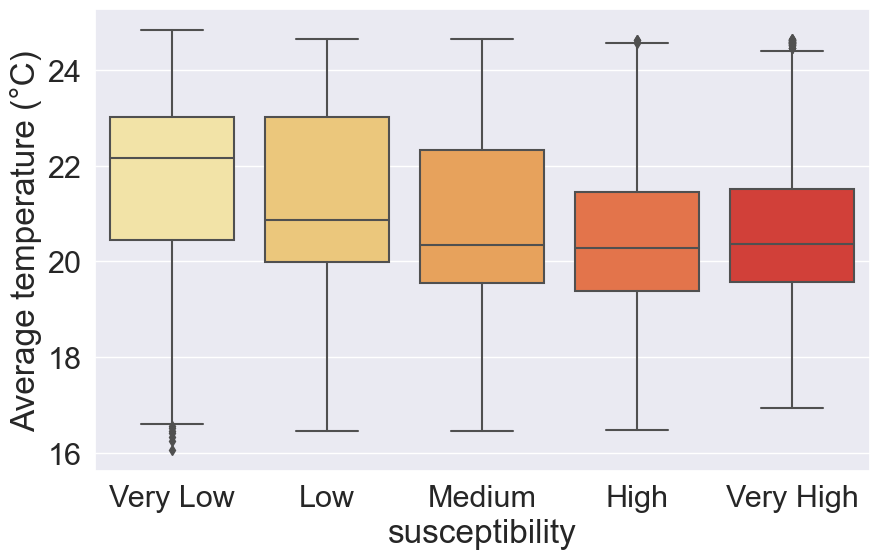

tasmax


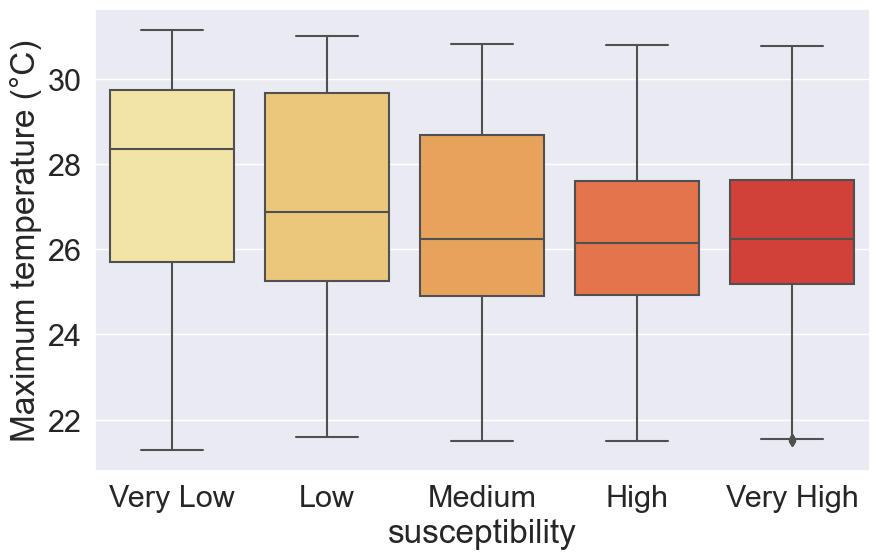

tasmin


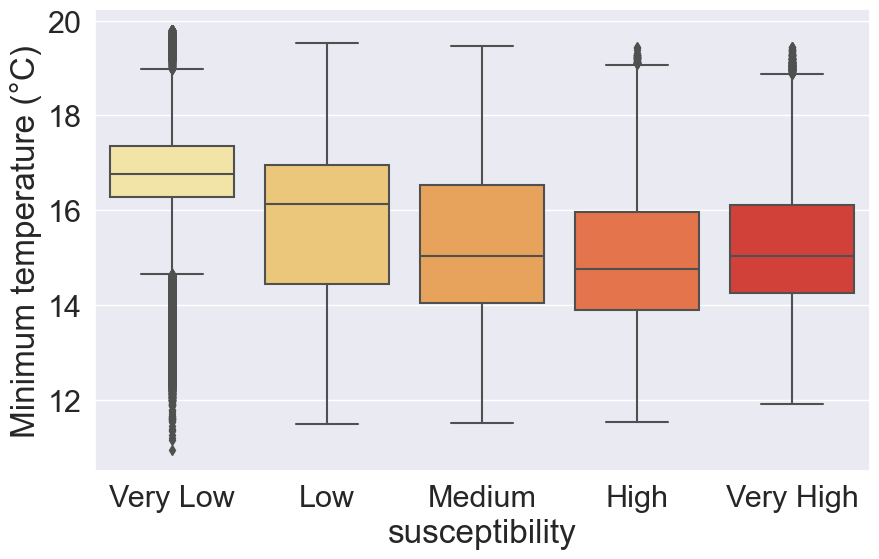

wind


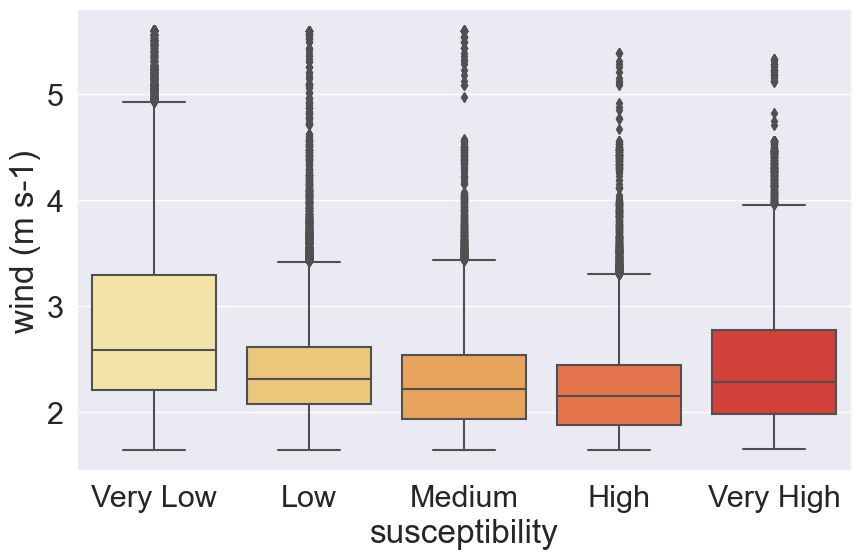

aspect_sin


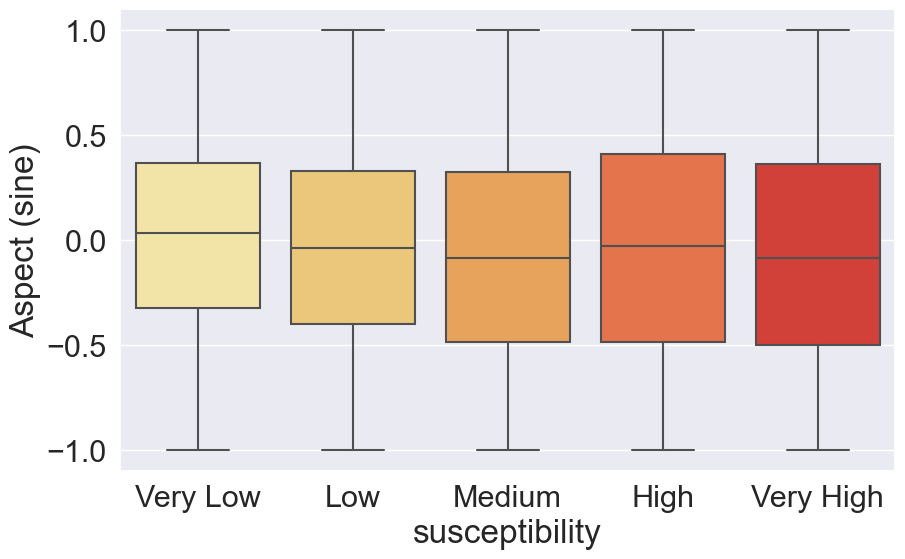

aspect_cos


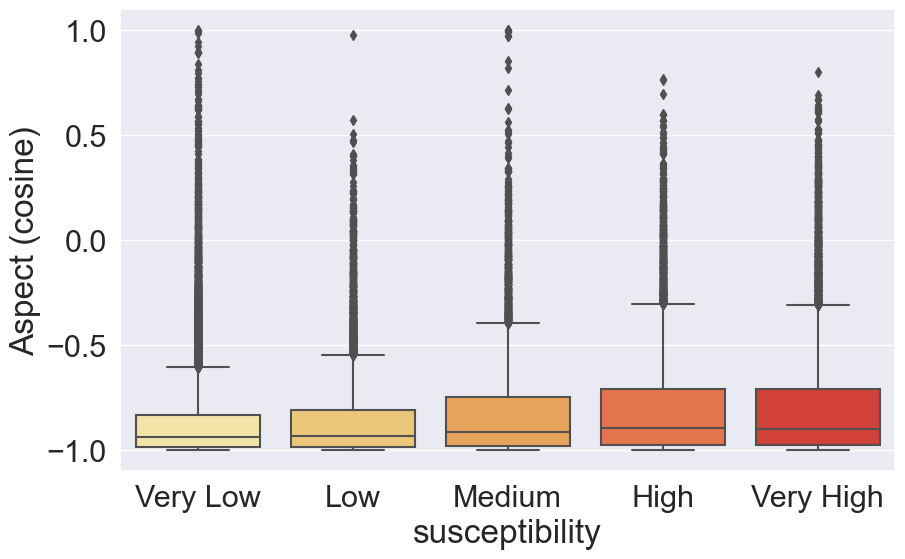

DEM


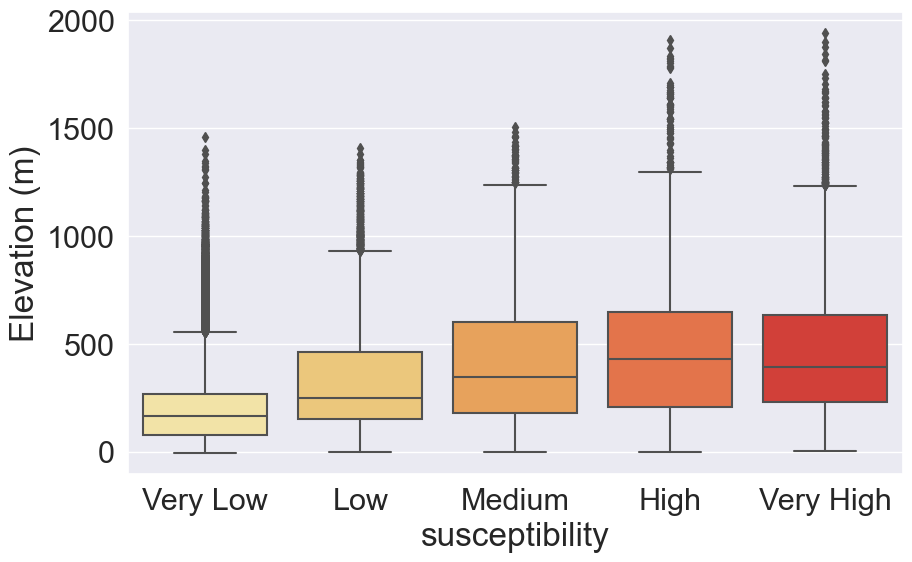

slope


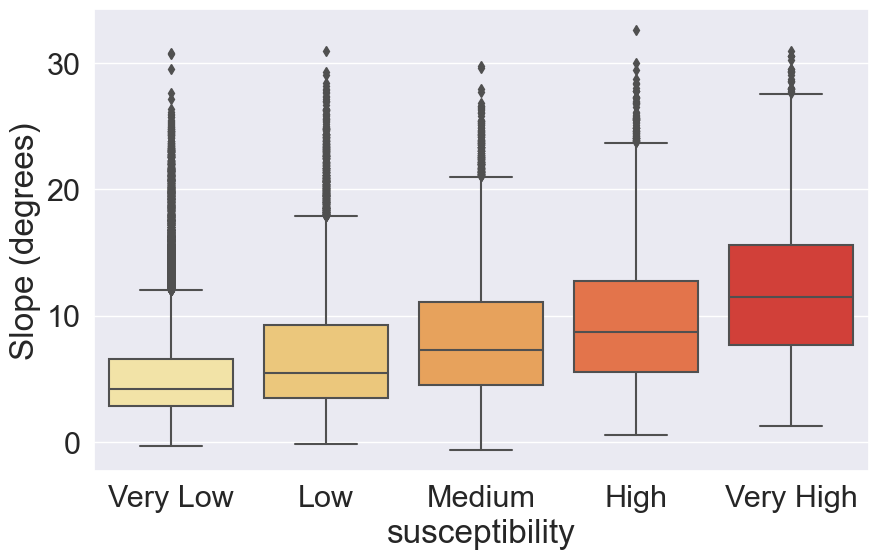

rvr_pr_


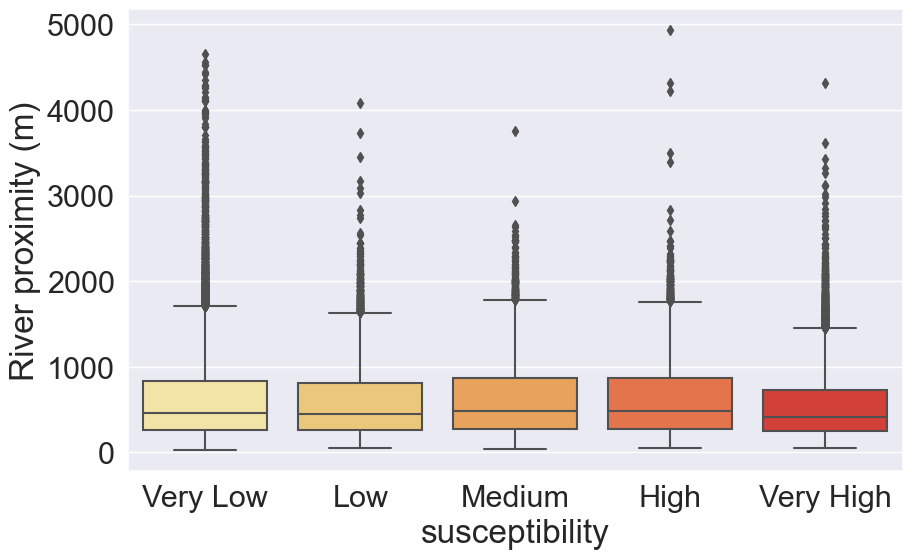

BARE_vg


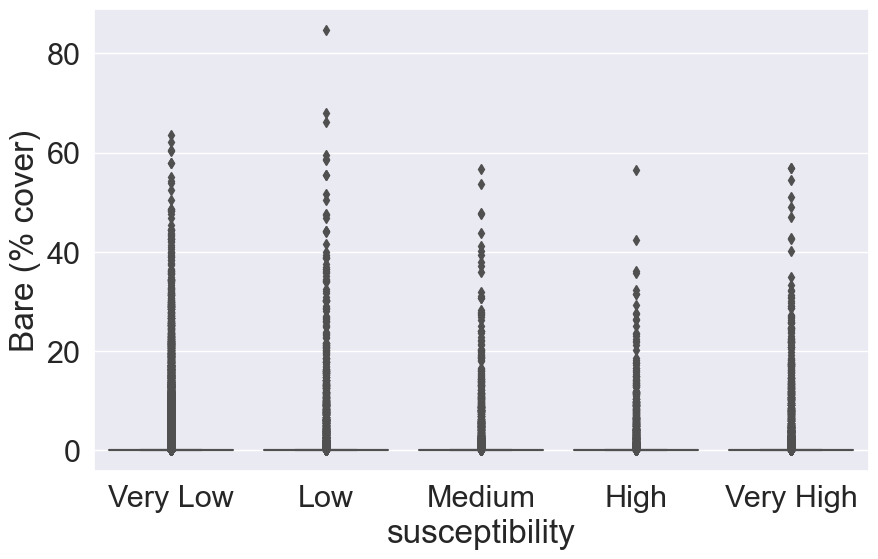

GRASS-N


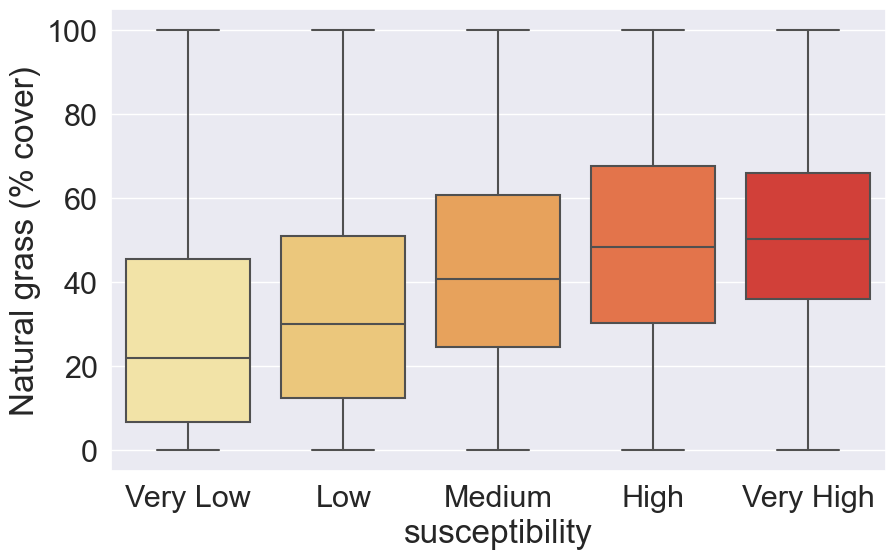

SHRUBS-B


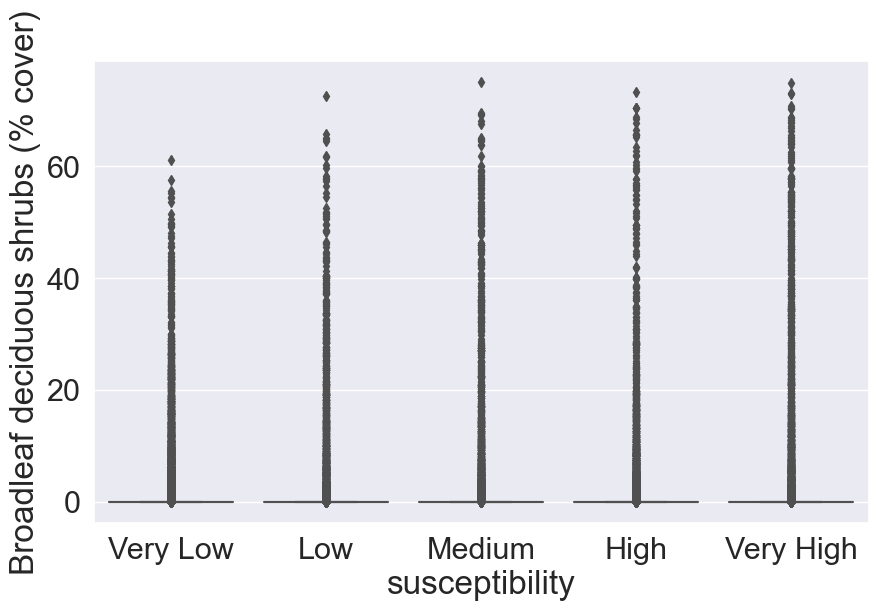

SHRUBS-N


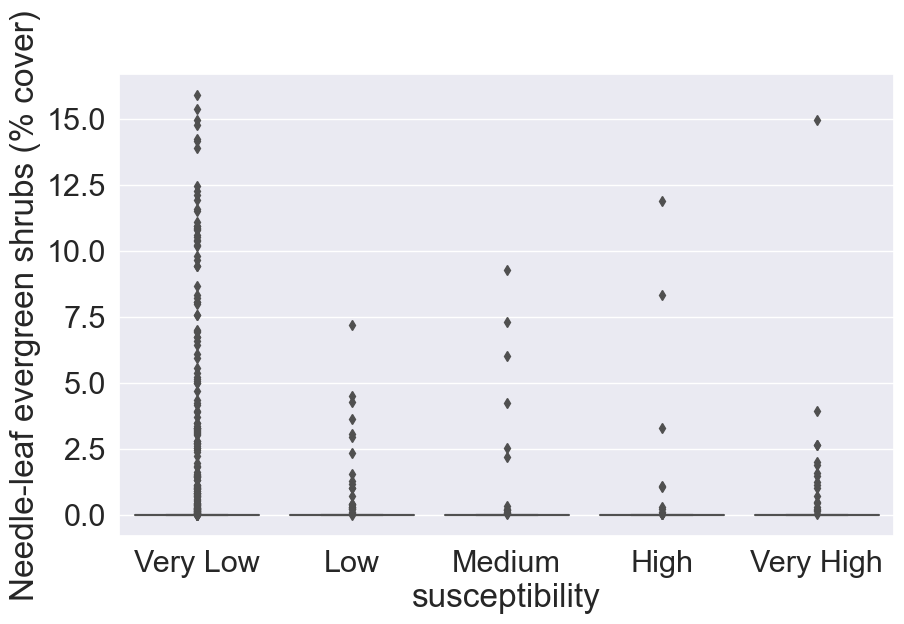

TREES-B


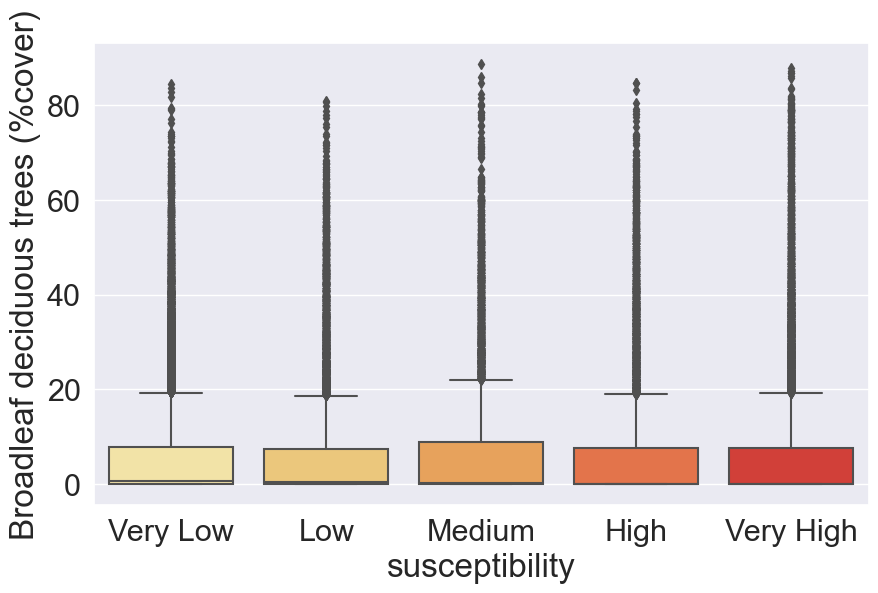

TREES-NE


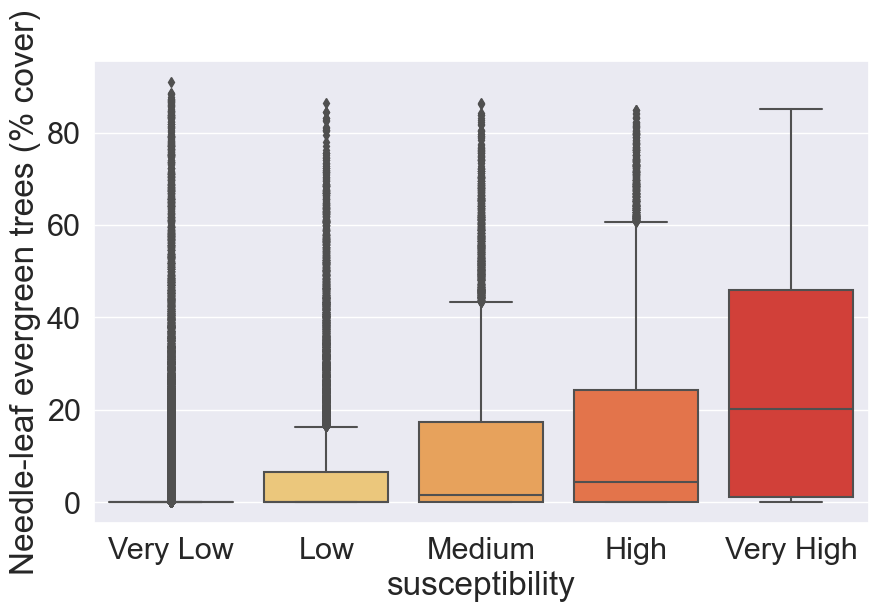

In [137]:

# list of features to plot
features = ['hurs', 'pr', 'tas', 'tasmax', 'tasmin', 'wind', 'aspect_sin',
          'aspect_cos','DEM', 'slope', 'rvr_pr_', 'BARE_vg',
            'GRASS-N','SHRUBS-B', 'SHRUBS-N', 'TREES-B', 'TREES-NE']

y_axis = ['Relative Humidity (%)', 'Precipitation (mm)', 'Average temperature (°C)',
         'Maximum temperature (°C)', 'Minimum temperature (°C)', 'wind (m s-1)', 
         'Aspect (sine)', 'Aspect (cosine)', 'Elevation (m)', 'Slope (degrees)', 
         'River proximity (m)', "Bare (% cover)", 'Natural grass (% cover)', 
         'Broadleaf deciduous shrubs (% cover)', 'Needle-leaf evergreen shrubs (% cover)',
         'Broadleaf deciduous trees (%cover)', 'Needle-leaf evergreen trees (% cover)']

sns.set(font_scale = 2)

# plot a boxplot grouped by 'susceptibility' for each feature
for feature, ylabel in zip(features, y_axis):   
    print(feature)
    plt.figure(figsize=(10,6))
    sns.boxplot(x='susceptibility', 
                y=feature, data=final, 
                order=["Very Low", "Low", "Medium", "High", "Very High"],
                palette = sns.color_palette("YlOrRd"))
    
    # give it an appropriate x axis 
    plt.ylabel(ylabel)  
    plt.show()

# Feature importance and interpretability

#### The code below for generating feature attributions using integrated gradients was adapted from the official Pytorch geometric document:

https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/models/captum.html

#### and also the captum Integrated Gradients tutorial on the official website:

https://captum.ai/tutorials/Titanic_Basic_Interpret

In [81]:
from captum.attr import IntegratedGradients, GradientShap
from torch_geometric.nn import to_captum_model, to_captum_input

In [82]:
# create a baseline tensor of the mean of our entire dataset:

# i.e. the mean of each feature across the dataset
mean_values = present_cci_pyg_graph.x.mean(dim=0)

# the baseline tensor has to be the same shape as our input tensor (it was (1, number of nodes, number of features))
baseline_tensor = mean_values.repeat((present_cci_pyg_graph.x.shape[0], 1)).unsqueeze(0)

print(baseline_tensor)

tensor([[[0.1246, 0.3197, 0.0743,  ..., 0.0088, 0.7781, 0.9212],
         [0.1246, 0.3197, 0.0743,  ..., 0.0088, 0.7781, 0.9212],
         [0.1246, 0.3197, 0.0743,  ..., 0.0088, 0.7781, 0.9212],
         ...,
         [0.1246, 0.3197, 0.0743,  ..., 0.0088, 0.7781, 0.9212],
         [0.1246, 0.3197, 0.0743,  ..., 0.0088, 0.7781, 0.9212],
         [0.1246, 0.3197, 0.0743,  ..., 0.0088, 0.7781, 0.9212]]],
       device='cuda:0')


In [83]:
# randomly select 100 blocks:
np.random.seed(7)
rand_blocks = np.random.choice(unique_blocks, 100, replace=False)

In [85]:
# Explain predictions for all nodes
# This takes hours

import gc
def compute_int_grad(indices):
    
    mask_type = "node"
    all_attributions = []  # a list to store node-wise attributions
    
    # for progress messages...
    total_iterations = len(indices)
    step_size = total_iterations // 10
    current_iteration = 0

    for idx in indices:
        
        
        captum_model = to_captum_model(model, mask_type, output_idx=idx)
        inputs, additional_forward_args = to_captum_input(present_cci_pyg_graph.x, 
                                                          present_cci_pyg_graph.edge_index, mask_type)

        ig = IntegratedGradients(captum_model)
        attribution = ig.attribute(inputs=inputs,
                                   target=None,
                                   additional_forward_args=additional_forward_args,
                                   internal_batch_size=1,
                                   baselines=baseline_tensor)

        tensor_attribution = attribution[0].cpu().detach()
        sum_attribution = tensor_attribution.sum(dim=1).squeeze()

        # add the individual node's attribution to the list
        all_attributions.append(sum_attribution.numpy())
        
        # clear memory to prevent memory accumulation (= memmory errors)
        del captum_model
        del inputs
        del additional_forward_args
        del ig
        del attribution
        torch.cuda.empty_cache()
        gc.collect()
        
        current_iteration += 1
        
        # because this takes so long, i just want to have an idea of how much more computing we need to do...
        if current_iteration % step_size == 0:
            
            percentage = current_iteration * 100 // total_iterations
            print(f"{percentage}% completed")


    # convert the list of node attributions to DataFrame
    columns = ['hurs', 'pr', 'tas', 'tasmax', 'tasmin', 'wind', 'aspect_sin',
               'aspect_cos','DEM', 'slope', 'rvr_pr_', 'BARE_vg',
               'GRASS-N','SHRUBS-B', 'SHRUBS-N', 'TREES-B', 'TREES-NE']
    
    attribution_df = pd.DataFrame(all_attributions, columns = columns)
    
    return attribution_df

In [86]:

ig_indices = present_cci_sdf[present_cci_sdf['block_id'].isin(rand_blocks)]['id'].to_list()

attribution_df = compute_int_grad(ig_indices)
    


9% completed
19% completed
29% completed
39% completed
49% completed
59% completed
69% completed
79% completed
89% completed
99% completed


In [140]:
# reset Seaborn settings to default
sns.set()

# reset matplotlib rc parameters to default
plt.rcParams.update(plt.rcParamsDefault)

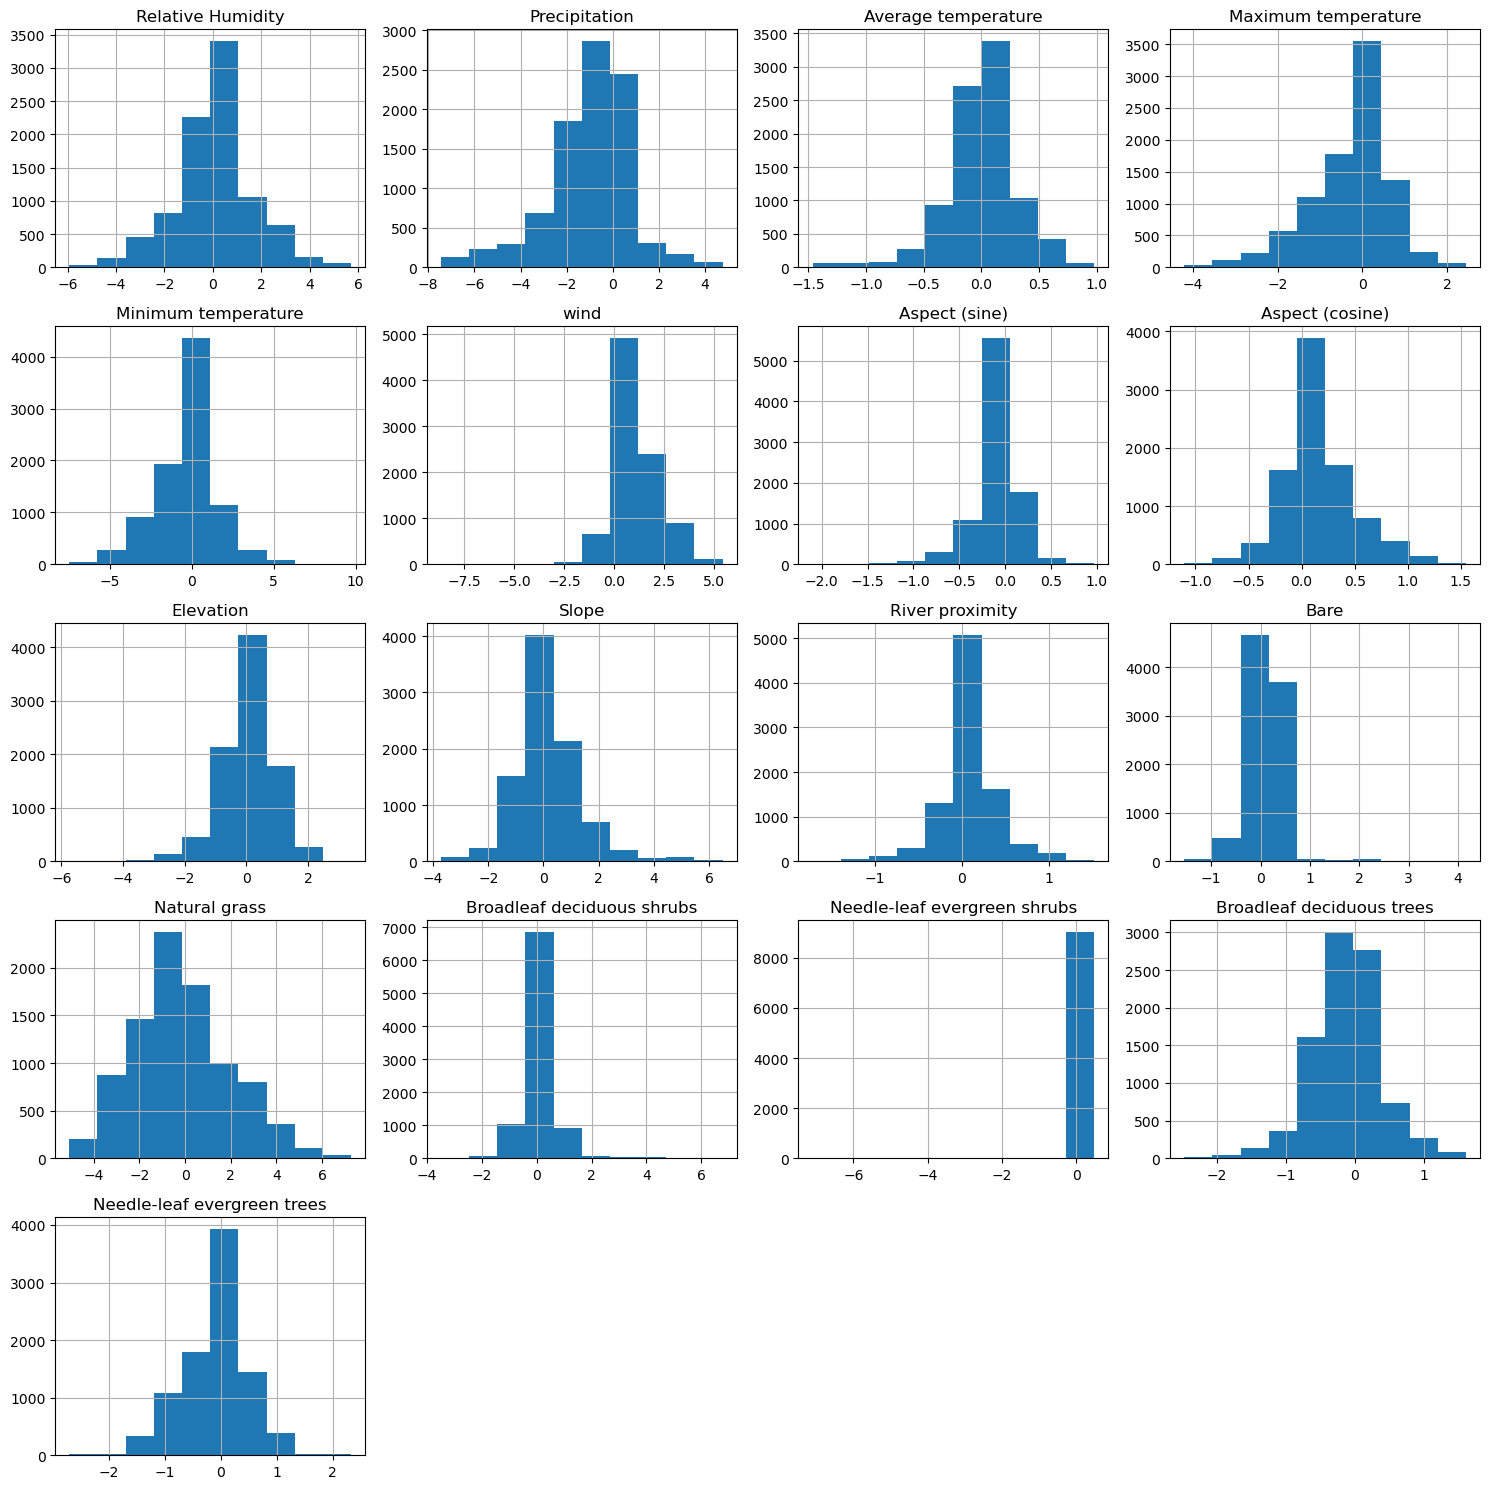

In [131]:
# Univariate analysis
columns_to_plot = ['hurs', 'pr', 'tas', 'tasmax', 'tasmin', 'wind', 'aspect_sin',
                  'aspect_cos', 'DEM', 'slope', 'rvr_pr_', 'BARE_vg',
                  'GRASS-N', 'SHRUBS-B', 'SHRUBS-N', 'TREES-B', 'TREES-NE']

titles = ['Relative Humidity', 'Precipitation', 'Average temperature',
         'Maximum temperature', 'Minimum temperature', 'wind', 
         'Aspect (sine)', 'Aspect (cosine)', 'Elevation', 'Slope', 
         'River proximity', "Bare", 'Natural grass', 
         'Broadleaf deciduous shrubs', 'Needle-leaf evergreen shrubs',
         'Broadleaf deciduous trees', 'Needle-leaf evergreen trees']

# plotting
ax_arr = attribution_df[columns_to_plot].hist(figsize=[15, 15])

for ax, title in zip(ax_arr.flatten(), titles):
    ax.set_title(title)

plt.tight_layout()
plt.show()

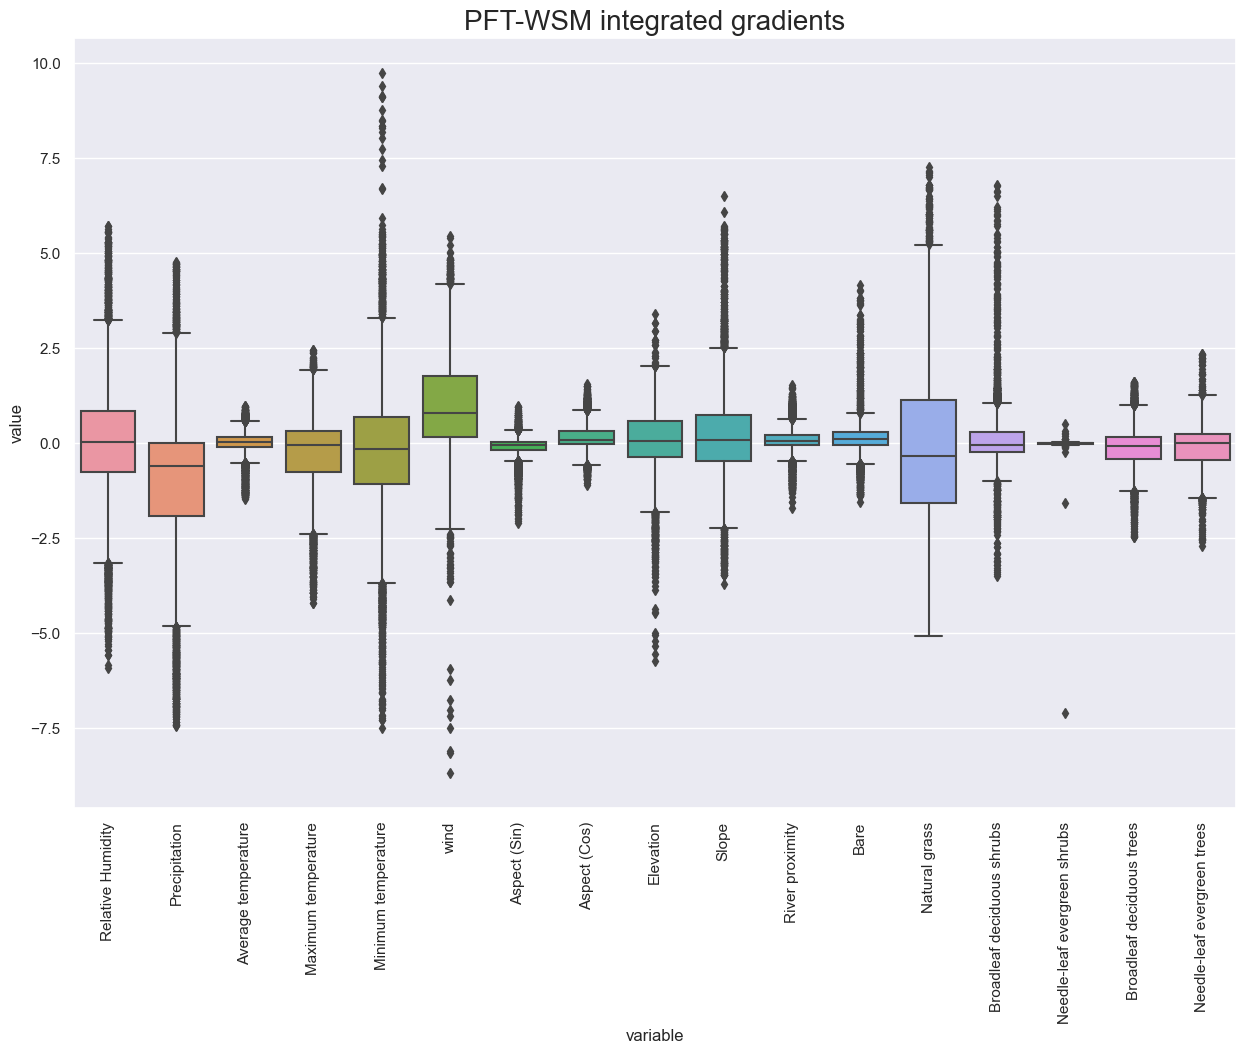

In [154]:
import seaborn as sns


columns_to_plot = ['hurs', 'pr', 'tas', 'tasmax', 'tasmin', 'wind', 'aspect_sin',
                  'aspect_cos', 'DEM', 'slope', 'rvr_pr_', 'BARE_vg',
                  'GRASS-N', 'SHRUBS-B', 'SHRUBS-N', 'TREES-B', 'TREES-NE']

titles = ['Relative Humidity', 'Precipitation', 'Average temperature',
         'Maximum temperature', 'Minimum temperature', 'wind', 
         'Aspect (Sin)', 'Aspect (Cos)', 'Elevation', 'Slope', 
         'River proximity', "Bare", 'Natural grass', 
         'Broadleaf deciduous shrubs', 'Needle-leaf evergreen shrubs',
         'Broadleaf deciduous trees', 'Needle-leaf evergreen trees']

# convert to long form
df_melted = pd.melt(attribution_df, value_vars=columns_to_plot)

# replace the 'variable' column values with the human-readable titles
df_melted['variable'] = df_melted['variable'].replace(columns_to_plot, titles)

# plot the boxplot
sns.set(font_scale=1)
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xticks(rotation=90)
plt.title("PFT-WSM integrated gradients", fontsize = 20)  
plt.show()

In [90]:
# function to compute the count of positive, negative, and zero values
def value_counts(x):
    return {
        "positive": (x > 0).sum(),
        "negative": (x < 0).sum(),
        "zero": (x == 0).sum()
    }

def calc_stats (dataframe):
    
    # dataframe statistics
    stats_df = pd.DataFrame({
        'mean': dataframe.mean(),
        'median': dataframe.median(),
        'mode': dataframe.mode().iloc[0],
        'skewness': dataframe.skew(),
    }).join(pd.DataFrame(dataframe.apply(value_counts).tolist(), index=dataframe.columns))

    
    return(stats_df)


In [91]:
stats_individual = calc_stats(attribution_df)
stats_individual

,mean,median,mode,skewness,positive,negative,zero
hurs,0.058395,0.029601,-5.927054,-0.013648,4685,4361,0
pr,-0.998571,-0.598913,-7.448724,-0.708046,2314,6732,0
tas,0.008018,0.017578,-1.463755,-0.825133,4984,4062,0
tasmax,-0.285583,-0.046479,-4.204249,-0.877063,4147,4899,0
tasmin,-0.273938,-0.153714,-7.486317,-0.048780,4068,4978,0
wind,1.009869,0.778982,-8.678089,0.161309,7623,1423,0
aspect_sin,-0.090452,-0.048208,-2.100480,-1.646347,3098,5948,0
aspect_cos,0.147711,0.079454,-1.106145,0.566479,6030,3016,0
DEM,0.048465,0.049717,-5.742639,-0.642585,4913,4133,0
slope,0.182191,0.075728,-3.717923,0.892229,5130,3916,0


In [93]:
stats_individual.to_excel(current_dir + "\\Data\\stats\\output_stats\\CCI-GCN\\int-grad.xlsx", index=False)